# **Dependent/Independent model Construction/Analysis with feature Scaling**

## **Libraries**

In [ ]:
pip install keras_tuner

In [ ]:
import pandas as pd # Library to process the dataframe
import numpy as np # Library to handle with numpy arrays
import warnings # Library that handles all the types of warnings during execution
import matplotlib.pyplot as plt# Library that handles ploting of  the graphs
warnings.filterwarnings("ignore") # Ignore all the warnings

In [ ]:
from tensorflow import keras 
from kerastuner.tuners import BayesianOptimization
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import kerastuner as kt
import os

In [ ]:
from sklearn.preprocessing import MinMaxScaler # scaling down huge values in dataset
sc = MinMaxScaler()

### **Data Preprocessing**

In [ ]:
def process(df):
  # input: unprocessed dataframe
  # output: processed dataframe
  df.reset_index(inplace=True)
  p=list(df.iloc[:,-1].values)
  #p.pop(0)
  df=df.drop(columns=['nfl_data']) # removing the header of dataframe
  df=df.rename(columns={"level_0":"Index","level_1":"Date(IST)","level_2":"NFO","level_3":"NFH","level_4":"NFL","level_5":"NFC","level_6":"FIIB","level_7":"FIIS","level_8":"FIIN","level_9":"DIIB","level_10":"DIIS","level_11":"DIIN","level_12":"August","level_13":"December","level_14":"CAD","level_15":"DAD","level_16":"DOD","level_17":"NDAD","level_18":"Currey","level_19":"Flow","level_20":"Shine"})
  df['Vega']=p
  df=df.drop(0)
  #print(df.columns)
  df=df.drop(columns=['Index'])
  df=df.dropna(how='any')
  df['NFO']=pd.to_numeric(df['NFO'])
  df['NFO']=sc.fit_transform(df['NFO'].values.reshape(-1,1)).astype('float64')
  df['NFH']=pd.to_numeric(df['NFH']).astype('float64')
  df['NFL']=pd.to_numeric(df['NFL']).astype('float64')
  df['NFC']=pd.to_numeric(df['NFC'])
  df['NFC']=sc.fit_transform(df['NFC'].values.reshape(-1,1)).astype('float64')
  df['FIIB']=pd.to_numeric(df['FIIB'])
  df['FIIB']=sc.fit_transform(df['FIIB'].values.reshape(-1,1)).astype('float64')
  df['FIIS']=pd.to_numeric(df['FIIS'])
  df['FIIS']=sc.fit_transform(df['FIIS'].values.reshape(-1,1)).astype('float64')
  df['FIIN']=pd.to_numeric(df['FIIN'])
  df['FIIN']=sc.fit_transform(df['FIIN'].values.reshape(-1,1)).astype('float64')
  df['DIIB']=pd.to_numeric(df['DIIB'])
  df['DIIB']=sc.fit_transform(df['DIIB'].values.reshape(-1,1)).astype('float64')
  df['DIIS']=pd.to_numeric(df['DIIS'])
  df['DIIS']=sc.fit_transform(df['DIIS'].values.reshape(-1,1)).astype('float64')
  df['August']=pd.to_numeric(df['August'])
  df['August']=sc.fit_transform(df['August'].values.reshape(-1,1)).astype('float64')
  df['December']=pd.to_numeric(df['December'])
  df['December']=sc.fit_transform(df['December'].values.reshape(-1,1)).astype('float64')
  df['CAD']=pd.to_numeric(df['CAD']).astype('float64')
  df['DAD']=pd.to_numeric(df['DAD']).astype('float64')
  df['DOD']=pd.to_numeric(df['DOD']).astype('float64')
  df['NDAD']=pd.to_numeric(df['NDAD']).astype('float64')
  df['Flow']=pd.to_numeric(df['Flow']).astype('float64')
  df['Currey']=pd.to_numeric(df['Currey']).astype('float64')
  df['Shine']=pd.to_numeric(df['Shine']).astype('float64')
  df['Vega']=pd.to_numeric(df['Vega']).astype('float64')
  df['nfh']=sc.fit_transform(df['NFH'].values.reshape(-1,1)).astype('float64')
  df['nfl']=sc.fit_transform(df['NFL'].values.reshape(-1,1)).astype('float64')
  df=df.drop(columns=['NFH','NFL'])
  #df = df[5::6]
  return df

In [ ]:
df=pd.read_csv('csv_nfl_data.csv')
df=process(df)
df


,Date(IST),NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh,nfl
1,2020-01-02,0.550682,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,0.537827,0.571552
2,2020-01-03,0.560137,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,0.549968,0.574100
3,2020-01-06,0.569330,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,0.552886,0.575098
4,2020-01-07,0.565106,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,0.545863,0.557377
5,2020-01-08,0.554650,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,0.539722,0.552135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-06-24,0.991474,0.978029,0.063734,0.123039,0.145925,0.302320,0.279636,1138.76,0.063936,0.573867,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,0.993836,0.983483
353,2021-06-25,0.985429,0.984289,0.059193,0.083988,0.205656,0.432029,0.378875,1832.76,0.091081,0.387393,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000,0.990768,0.986924
354,2021-06-28,0.991094,0.993188,0.024723,0.060763,0.179197,0.325005,0.294814,1277.08,0.090986,0.412344,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000,0.993554,0.994166
355,2021-06-29,1.000000,0.993143,0.116848,0.135800,0.227135,0.595092,0.618669,1810.05,0.075286,0.506894,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,0.998678,0.998843


## **Dependent Model Analysis (Pipeline Model)**

In [ ]:
Df=df.copy()
df=df.drop(columns=['nfl'])
df


,Date(IST),NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh
1,2020-01-02,0.550682,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,0.537827
2,2020-01-03,0.560137,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,0.549968
3,2020-01-06,0.569330,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,0.552886
4,2020-01-07,0.565106,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,0.545863
5,2020-01-08,0.554650,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,0.539722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-06-24,0.991474,0.978029,0.063734,0.123039,0.145925,0.302320,0.279636,1138.76,0.063936,0.573867,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,0.993836
353,2021-06-25,0.985429,0.984289,0.059193,0.083988,0.205656,0.432029,0.378875,1832.76,0.091081,0.387393,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000,0.990768
354,2021-06-28,0.991094,0.993188,0.024723,0.060763,0.179197,0.325005,0.294814,1277.08,0.090986,0.412344,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000,0.993554
355,2021-06-29,1.000000,0.993143,0.116848,0.135800,0.227135,0.595092,0.618669,1810.05,0.075286,0.506894,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,0.998678


### **Train/Test Split**

In [ ]:
df_permutated = df.sample(frac=1)

train_size = 0.7# 70%-train set and 30% -test set
train_end = int(len(df_permutated)*train_size)

df_train = df_permutated[:train_end]
df_test = df_permutated[train_end:]

In [ ]:
df_train=df_train.reset_index()
df_train.to_csv('train.csv')


In [ ]:
df_train=df_train.drop(columns=['index','Date(IST)'])

In [ ]:
df_train

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh
0,0.466811,0.465211,0.030323,0.045611,0.216737,0.130745,0.263119,-672.23,0.089189,0.346684,-0.53,-0.2050,-0.95,0.59,0.2240,-0.1239,0.97,0.179998,0.448261
1,0.662447,0.664310,0.061482,0.075722,0.224639,0.156068,0.450012,-1840.33,0.051452,0.617859,-1.04,-0.1300,-1.30,0.06,-0.3083,0.2400,0.04,-0.389999,0.653708
2,0.647262,0.647293,0.137760,0.087975,0.351933,0.172415,0.615594,-2944.05,0.096283,0.315824,0.25,-0.0410,1.21,-0.32,0.0905,0.1258,-1.04,-1.040001,0.642100
3,0.410847,0.416639,0.079162,0.060898,0.285169,0.133159,0.273715,-727.39,0.087298,0.351937,1.85,0.2050,0.74,-0.29,-0.2538,0.3229,0.11,0.380001,0.395193
4,0.920725,0.927869,0.024397,0.035475,0.222978,0.149285,0.280464,-597.62,0.070652,0.490479,-0.06,0.1251,0.48,-0.38,-0.0720,0.4050,-0.04,-1.280001,0.925378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.988470,0.990788,0.071381,0.065217,0.262402,0.174797,0.449803,-1626.98,0.090041,0.395929,-0.09,-0.0816,0.14,0.06,0.1125,0.3000,-0.29,0.650000,0.990595
244,0.991474,0.978029,0.063734,0.123039,0.145925,0.302320,0.279636,1138.76,0.063936,0.573867,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,0.993836
245,0.457313,0.457590,0.028784,0.033374,0.235226,0.153358,0.307702,-763.54,0.092689,0.313198,-0.80,-0.1700,0.15,-0.14,0.1010,-0.0199,0.96,-0.150002,0.437582
246,0.674675,0.673025,0.165859,0.136113,0.322203,0.241746,0.522996,-1439.74,0.121631,0.168089,-0.13,-0.0450,0.40,-4.46,0.1010,0.1513,-0.35,0.110001,0.661290


In [ ]:
X_train=df_train.iloc[:,:-1].values
y_train=df_train.iloc[:,-1].values
X_train = np.asarray(X_train).astype(np.float32)
y_train =np.array(y_train).astype(np.float32)

In [ ]:
df_test=df_test.reset_index()
df_test.to_csv('test.csv')

In [ ]:
date=df_test['Date(IST)']
df_test=df_test.drop(columns=['index','Date(IST)'])

In [ ]:
df_test

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh
0,0.554621,0.552737,0.033149,0.034489,0.241783,0.158217,0.162931,417.96,0.090514,0.298096,-0.10,0.0350,-1.76,0.58,-0.0935,-0.3850,0.28,1.580001,0.540020
1,0.467050,0.461942,0.027053,0.034483,0.229901,0.122475,0.207851,-335.64,1.000000,0.359816,0.96,0.5950,2.53,1.66,-0.7570,0.1379,-0.34,-0.170000,0.445319
2,0.114885,0.124610,0.088951,0.076729,0.276462,0.133677,0.406879,-1757.79,0.104984,0.206829,0.46,0.2350,2.46,3.19,0.4420,-0.1009,0.10,-3.350002,0.102956
3,0.861552,0.870601,0.086676,0.102375,0.226979,0.256022,0.287682,552.78,0.107349,0.259357,0.34,0.0881,-0.80,2.74,0.2255,-0.0040,0.49,-0.209999,0.869432
4,0.494888,0.495487,0.068580,0.076505,0.237111,0.130583,0.276120,-775.23,0.063653,0.504924,-0.82,-0.1779,1.22,2.98,-0.1610,0.0350,0.13,3.160002,0.479605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.076380,0.061243,0.059195,0.144624,0.099158,0.595552,0.290698,4367.43,0.099215,0.271175,-2.06,0.0250,-0.68,-7.50,0.5330,-0.3427,-0.20,-5.959999,0.081109
103,0.855223,0.856428,0.064642,0.097172,0.193129,0.394009,0.370508,1468.09,0.093635,0.342745,0.08,0.6434,0.00,0.98,-0.3480,-0.0190,0.37,-1.699999,0.853205
104,0.849040,0.869575,0.054114,0.055467,0.245840,0.200104,0.398587,-942.35,0.071881,0.479317,0.39,-0.1957,0.75,2.24,-0.4195,0.2800,-0.41,0.330000,0.863840
105,0.209531,0.218154,0.044001,0.059863,0.218389,0.171925,0.364286,-993.98,0.041048,0.667104,0.32,0.1080,0.56,1.78,0.2800,-0.0773,0.36,-5.450001,0.188011


In [ ]:
X_test=df_test.iloc[:,:-1].values
y_test=df_test.iloc[:,-1].values
X_test = np.asarray(X_test).astype(np.float32)
y_test =np.array(y_test).astype(np.float32)

In [ ]:
len(X_train)

248

In [ ]:
len(y_train)

248

In [ ]:
len(X_test)

107

In [ ]:
len(y_test)

107

### **Model Costruction**

In [ ]:
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [100, 200, 300,400,500]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model

### **Hyper tuning of Model for NFH training/Prediction**

In [ ]:
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=7,
    executions_per_trial=2,
    directory=os.path.normpath('DM/NFH:/keras_tuning'),
    project_name='timeseries_bayes_opt_POC',
    overwrite=True)

In [ ]:
def tune_model(X_train,y_train,y_test,X_test):
  tuner.search(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))
  bayes_opt_model_best_model = tuner.get_best_models(num_models=1)
  model = bayes_opt_model_best_model[0]
  print("the best model is given by {}".format(model))
  model.fit(X_train, y_train, epochs=5, batch_size=250, verbose=0)
  return model

In [ ]:
model=tune_model(X_train,y_train,y_test,X_test)

Trial 7 Complete [00h 02m 45s]
val_loss: 0.31848786771297455

Best val_loss So Far: 0.2765198051929474
Total elapsed time: 00h 14m 45s
INFO:tensorflow:Oracle triggered exit
the best model is given by <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f58cf769790>


### **Model Prediction**

In [ ]:
yhat = model.predict(X_test, verbose=0)

In [ ]:
yhat

array([[0.        ],
       [0.23468356],
       [0.41399053],
       [0.        ],
       [0.68936783],
       [0.21569495],
       [0.2566686 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.989533  ],
       [0.54095894],
       [0.38503698],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.6205259 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.5031286 ],
       [0.31471875],
       [0.        ],
       [0.93979317],
       [0.29921773],
       [0.        ],
       [0.05258231],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.3157659 ],
       [0.        ],
       [0.        ],
       [0.31716397],
       [0.09012656],
       [0.15007834],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.93069893],
       [0.        ],
       [0.        ],
       [0.   

In [ ]:
y_test1=sc.inverse_transform(y_test.reshape(-1,1))

In [ ]:
y_test1

array([[11881.965 ],
       [11072.272 ],
       [ 8145.0522],
       [14698.455 ],
       [11365.417 ],
       [11913.843 ],
       [10957.9795],
       [10903.081 ],
       [14815.472 ],
       [13660.03  ],
       [14732.359 ],
       [10521.63  ],
       [14822.931 ],
       [ 9638.348 ],
       [ 9006.745 ],
       [ 8875.274 ],
       [14366.697 ],
       [14541.331 ],
       [14783.289 ],
       [10021.589 ],
       [14991.886 ],
       [ 7264.7686],
       [14354.473 ],
       [10874.606 ],
       [ 8770.418 ],
       [13355.719 ],
       [11341.886 ],
       [ 8968.27  ],
       [15745.103 ],
       [14796.288 ],
       [ 7528.1846],
       [ 8974.577 ],
       [11819.279 ],
       [11799.706 ],
       [ 8673.896 ],
       [10093.015 ],
       [10615.819 ],
       [15146.359 ],
       [11052.798 ],
       [14396.846 ],
       [10544.449 ],
       [ 8626.572 ],
       [10873.948 ],
       [11821.51  ],
       [13499.155 ],
       [ 8536.327 ],
       [11778.241 ],
       [11901

In [ ]:
yhat1=sc.inverse_transform(yhat.reshape(-1,1))

In [ ]:
yhat1

array([[ 7264.7686],
       [ 9271.326 ],
       [10804.41  ],
       [ 7264.7686],
       [13158.9   ],
       [ 9108.972 ],
       [ 9459.299 ],
       [ 7264.7686],
       [ 7264.7686],
       [ 7264.7686],
       [ 7264.7686],
       [15725.329 ],
       [11889.996 ],
       [10556.855 ],
       [ 7264.7686],
       [ 7264.7686],
       [ 7264.7686],
       [ 7264.7686],
       [12570.298 ],
       [ 7264.7686],
       [ 7264.7686],
       [ 7264.7686],
       [11566.545 ],
       [ 9955.631 ],
       [ 7264.7686],
       [15300.051 ],
       [ 9823.097 ],
       [ 7264.7686],
       [ 7714.35  ],
       [ 7264.7686],
       [ 7264.7686],
       [ 7264.7686],
       [ 7264.7686],
       [ 7264.7686],
       [ 9964.584 ],
       [ 7264.7686],
       [ 7264.7686],
       [ 9976.538 ],
       [ 8035.3555],
       [ 8547.946 ],
       [ 7264.7686],
       [ 7264.7686],
       [ 7264.7686],
       [ 7264.7686],
       [15222.294 ],
       [ 7264.7686],
       [ 7264.7686],
       [ 7264

### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(y_test, yhat)
print(score)

0.24767292


In [ ]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(y_test1, yhat1)
print(score)

18105734.0


### **Data Visualization**

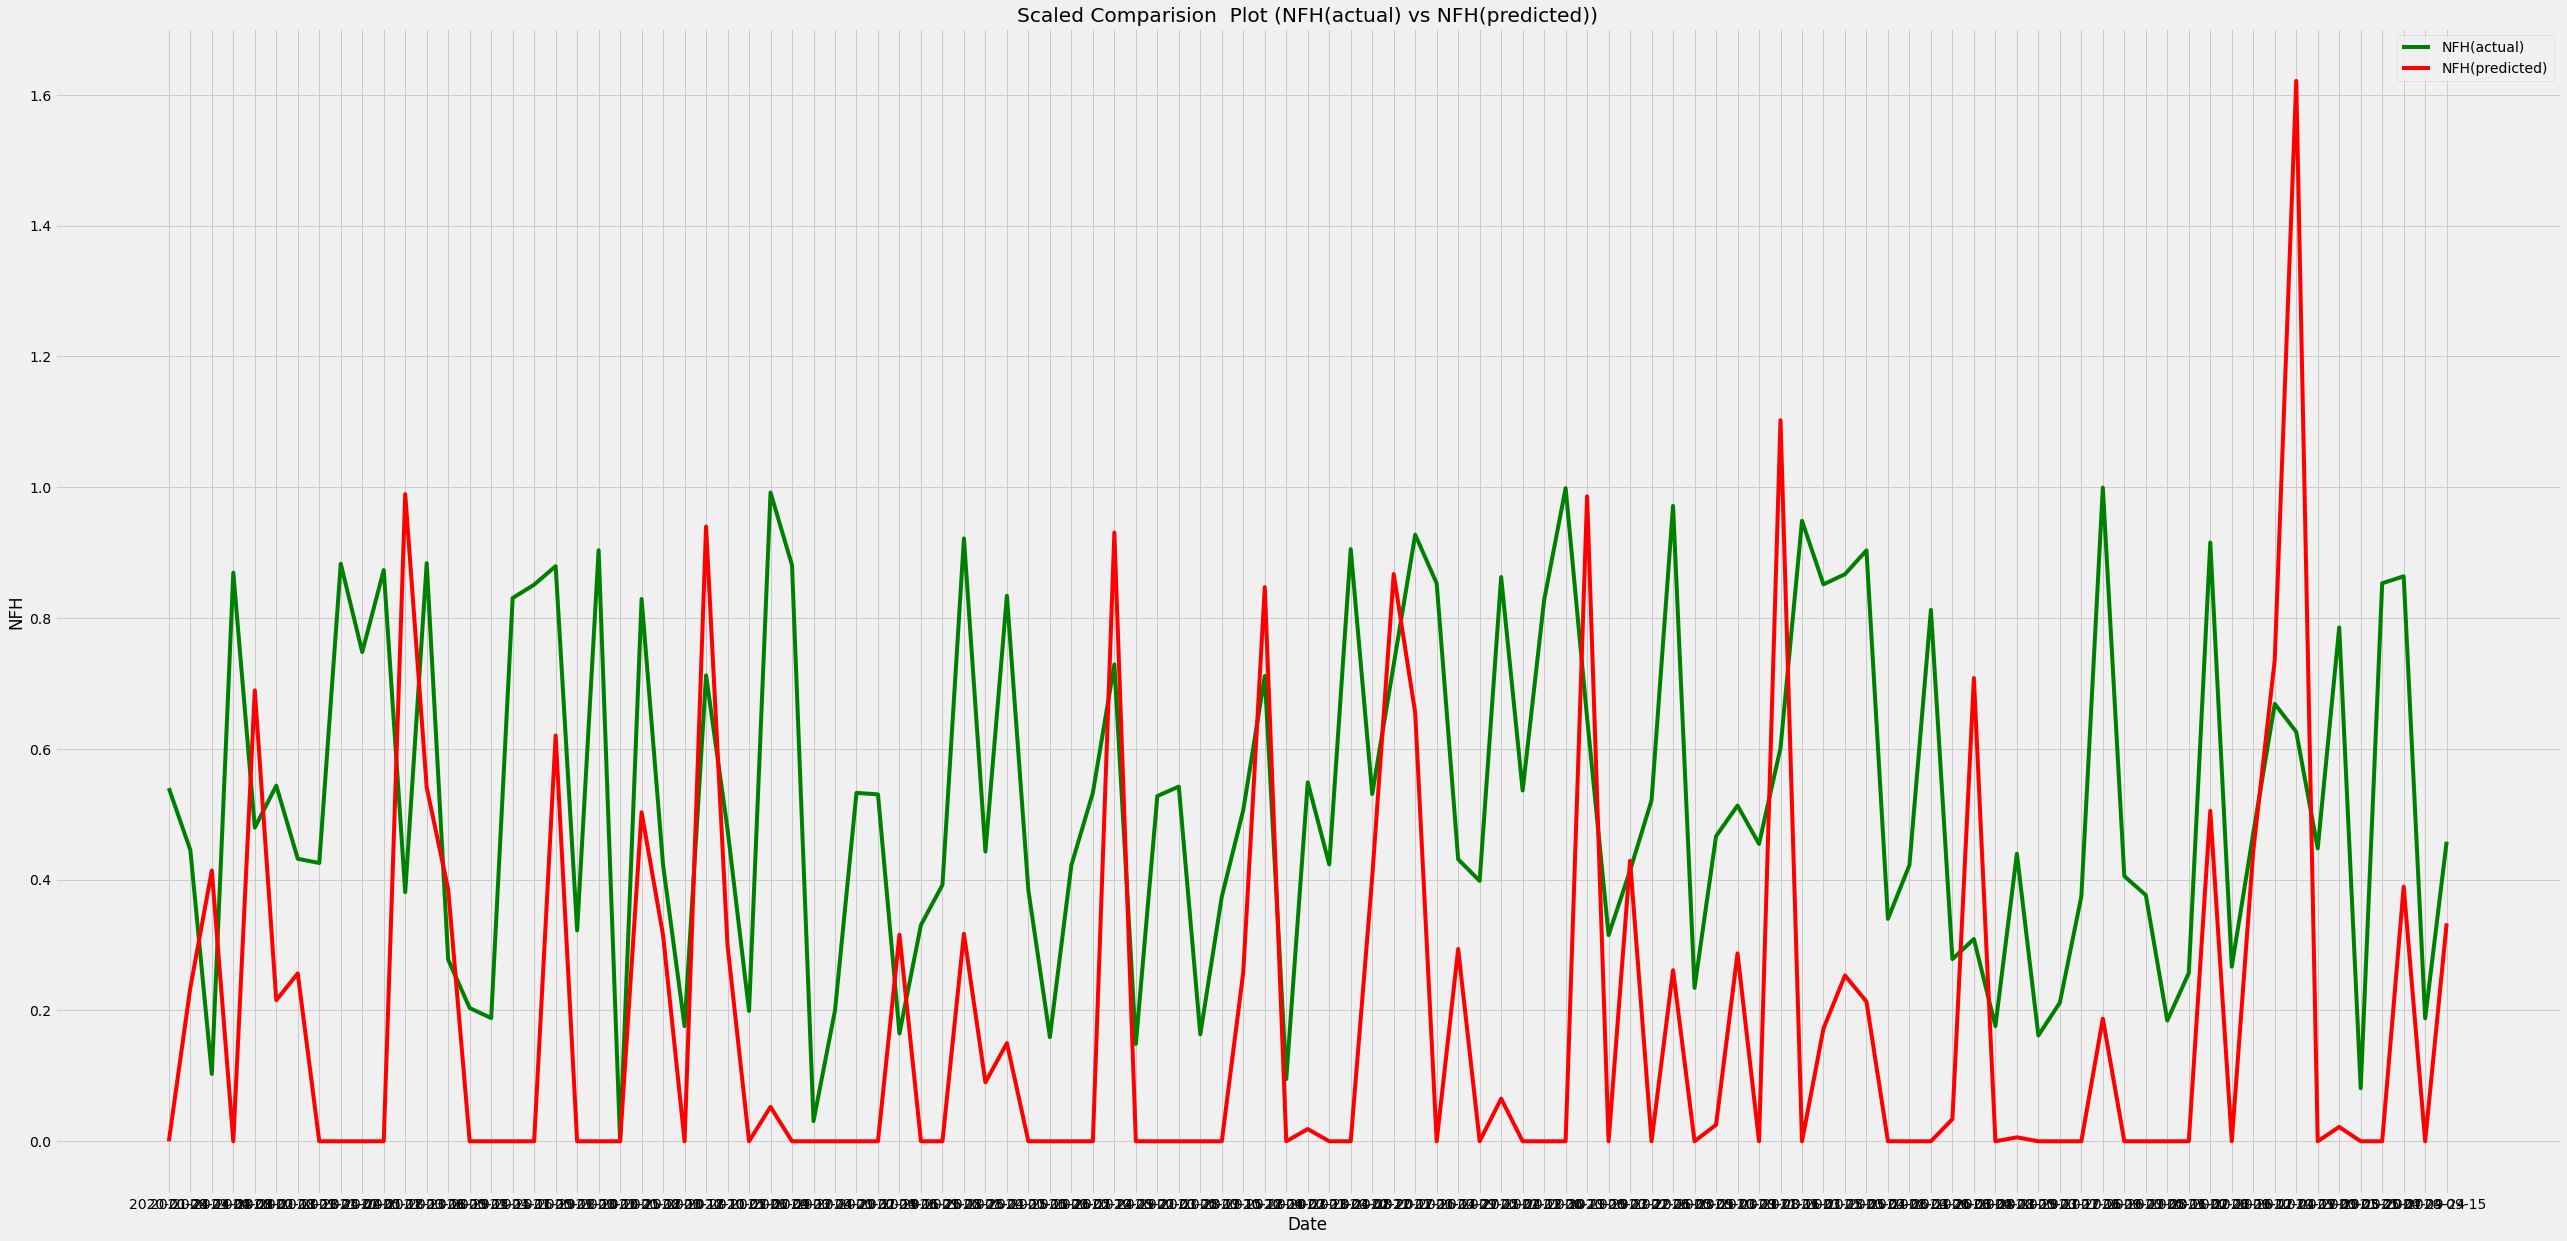

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test,label='NFH(actual)',color='green')
plt.plot(date,yhat,label='NFH(predicted)',color='red')
plt.grid(True)
plt.title('Scaled Comparision  Plot (NFH(actual) vs NFH(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH')
plt.style.use('fivethirtyeight')
plt.show()


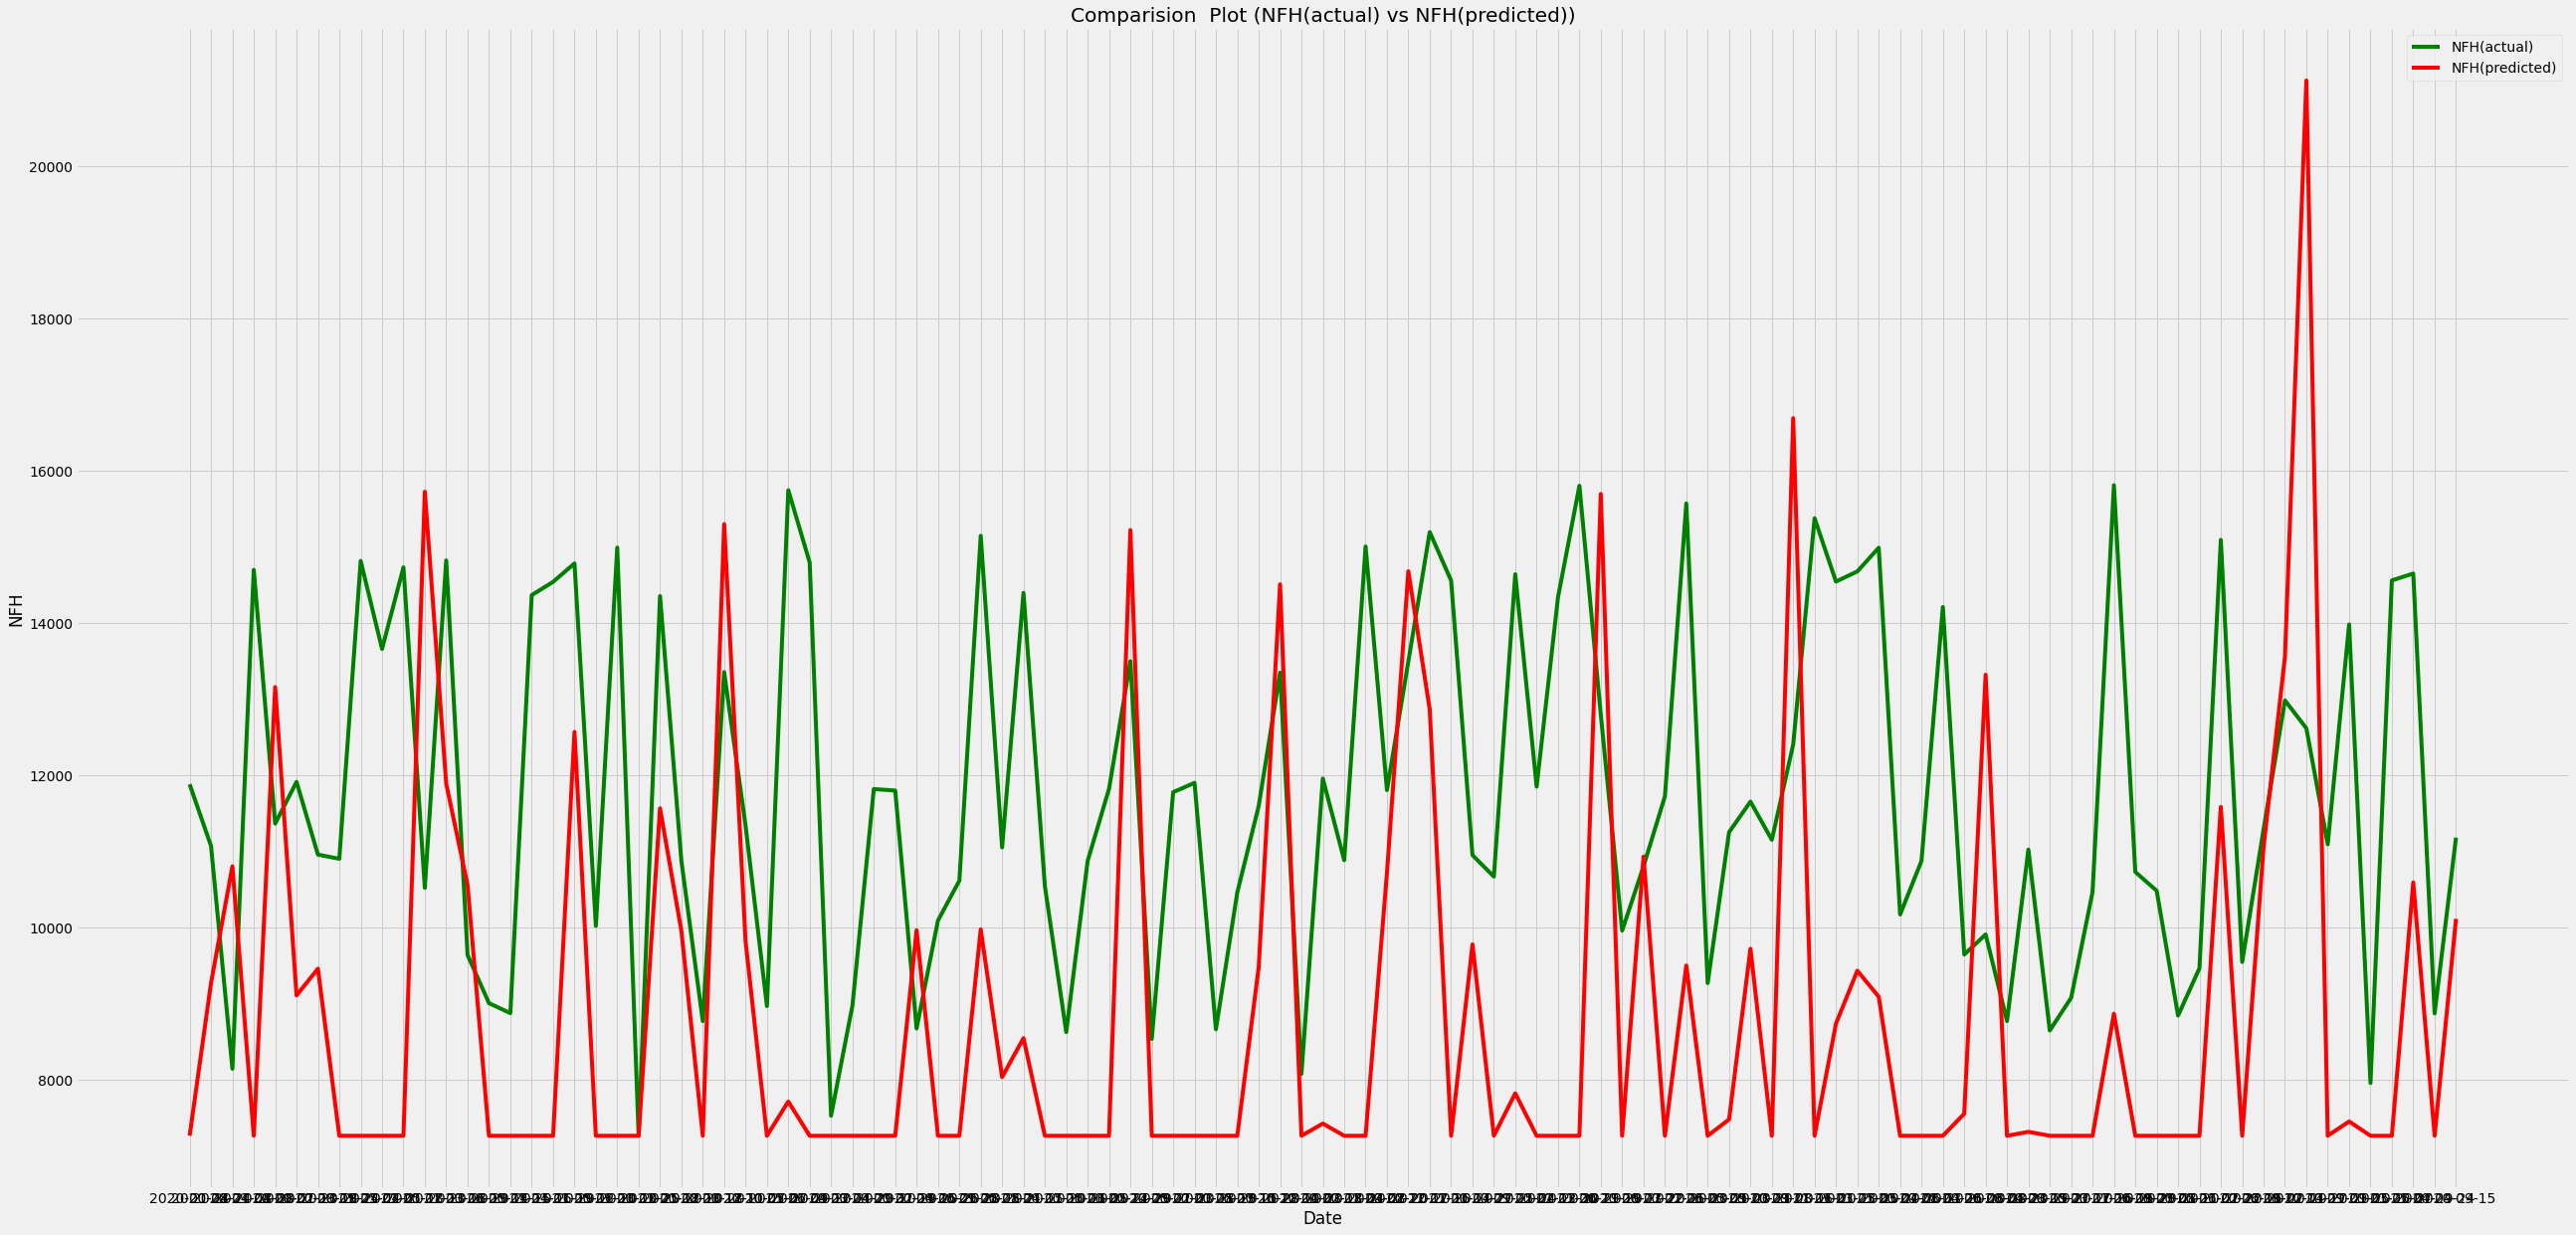

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test1,label='NFH(actual)',color='green')
plt.plot(date,yhat1,label='NFH(predicted)',color='red')
plt.grid(True)
plt.title('Comparision  Plot (NFH(actual) vs NFH(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH')
plt.style.use('fivethirtyeight')
plt.show()

## **NFL Training/Prediction**

In [ ]:
df=Df.copy()

In [ ]:
df_permutated = df.sample(frac=1)

train_size = 0.7# 70%-train set and 30% -test set
train_end = int(len(df_permutated)*train_size)

df_train = df_permutated[:train_end]
df_test = df_permutated[train_end:]

In [ ]:
df_train=df_train.reset_index()
df_train.to_csv('train.csv')

In [ ]:
df_train=df_train.drop(columns=['index','Date(IST)'])

In [ ]:
df_train

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh,nfl
0,0.815255,0.817144,0.099136,0.069663,0.308742,0.224393,0.648190,-2610.13,0.063464,0.589626,-0.27,-0.5692,0.65,2.09,0.1693,-0.0772,-0.45,2.520000,0.814407,0.819800
1,0.556089,0.557072,0.041689,0.037791,0.252646,0.087704,0.237636,-960.48,0.066017,0.463559,0.32,-0.1800,-1.08,0.34,-0.0411,0.0325,0.52,0.410000,0.543748,0.571245
2,0.124745,0.118839,0.042801,0.072512,0.193830,0.071816,0.149003,-450.36,0.078596,0.362443,-2.18,-0.9940,-2.20,-2.68,0.9830,-0.3500,0.55,3.520000,0.102069,0.127681
3,0.977239,0.982488,0.071888,0.064602,0.264472,0.170116,0.384921,-1175.01,0.095432,0.359160,0.12,0.2403,-0.24,2.17,-0.1460,0.1800,0.25,-1.620001,0.980673,0.982205
4,0.647262,0.647293,0.137760,0.087975,0.351933,0.172415,0.615594,-2944.05,0.096283,0.315824,0.25,-0.0410,1.21,-0.32,0.0905,0.1258,-1.04,-1.040001,0.642100,0.652552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.454532,0.438016,0.024827,0.050116,0.198101,0.220065,0.249591,442.73,0.067436,0.466842,-0.36,-0.6100,-0.67,1.41,0.0119,0.1103,0.66,-0.300001,0.437658,0.454641
244,0.635104,0.639122,0.168858,0.119952,0.356440,0.098719,0.622281,-3829.16,0.089946,0.355220,1.36,0.0616,2.51,-1.49,-0.1700,0.3331,-0.52,-0.390001,0.626032,0.642945
245,0.028664,0.014131,0.068071,0.116518,0.165841,0.345015,0.288340,1553.66,0.063936,0.486540,-0.43,1.7380,1.89,10.13,0.0850,0.9636,2.57,0.079998,0.030809,0.019752
246,0.551434,0.539135,0.036722,0.112839,0.111141,0.448006,0.147169,3816.44,0.053249,0.535128,-0.35,-0.6050,-2.40,0.50,-0.0246,-0.2982,0.08,3.350000,0.532688,0.555061


In [ ]:
X_train=df_train.iloc[:,:-1].values
y_train=df_train.iloc[:,-1].values
X_train = np.asarray(X_train).astype(np.float32)
y_train =np.array(y_train).astype(np.float32)

In [ ]:
df_test=df_test.reset_index()
df_test.to_csv('test.csv')

In [ ]:
date=df_test['Date(IST)']
df_test=df_test.drop(columns=['index','Date(IST)'])

#### **Replacing columns of NFH with predicted values of NFH for NFL analysis**

In [ ]:
nfh=df_test.iloc[:,19]
df_test.iloc[:,19]=yhat

In [ ]:
df_test

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh,nfl
0,0.012023,0.000000,0.094402,0.141768,0.172861,0.295721,0.321552,737.98,0.091081,0.266579,-1.19,0.6570,1.91,3.97,-0.0035,0.4623,-0.39,2.280003,0.000000,0.000000
1,0.529564,0.534685,0.049975,0.053854,0.240597,0.000000,0.119008,-1028.77,0.051546,0.615233,0.20,0.2500,-0.78,1.32,0.3730,-0.2651,-0.01,0.070000,0.518965,0.234684
2,0.550143,0.545447,0.030238,0.056183,0.198002,0.158182,0.179021,292.35,0.040197,0.657912,0.46,-0.1500,-1.20,0.62,0.2025,-0.1002,0.07,-0.900000,0.534867,0.413991
3,0.187158,0.179643,0.051238,0.069861,0.214947,0.329472,0.155864,2408.85,0.090514,0.264609,2.81,0.5770,1.03,-1.09,0.4389,-0.3588,-0.81,-0.389999,0.161760,0.000000
4,0.890132,0.865039,0.076188,0.073082,0.257967,0.241736,0.481400,-1116.17,0.030077,0.799081,0.16,-0.0250,-1.29,0.92,0.0720,-1.3000,-0.27,2.350000,0.883990,0.689368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.883307,0.893373,0.272295,0.437786,0.000000,0.493155,0.510471,1499.7,0.044737,0.693368,-0.78,-0.2799,-2.04,-2.03,1.2115,-0.5074,-0.78,-0.939999,0.895564,0.000000
103,0.846224,0.853060,0.073657,0.091281,0.221063,0.258507,0.430397,-529.69,0.099310,0.305975,-0.50,-0.3650,-2.76,0.45,0.1510,-0.9100,-0.38,1.420000,0.851494,0.000000
104,0.861173,0.855985,0.089814,0.073386,0.284016,0.208336,0.399196,-854.04,0.102336,0.273802,-0.44,0.0500,1.19,-1.23,-0.0840,-0.2012,0.89,0.750000,0.865010,0.389237
105,0.406177,0.399547,0.014787,0.048295,0.181711,0.139428,0.272837,-649.7,0.033292,0.732108,-0.55,0.4570,1.20,1.80,0.2549,0.1258,0.92,-2.669998,0.385220,0.000000


In [ ]:
X_test=df_test.iloc[:,:-1].values
y_test=df_test.iloc[:,-1].values
X_test = np.asarray(X_test).astype(np.float32)
y_test =np.array(y_test).astype(np.float32)

### **Hyper tuning of Model for NFL training/Prediction**

In [ ]:
tuner1 = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=7,
    executions_per_trial=2,
    directory=os.path.normpath('DM/NFL:/keras_tuning'),
    project_name='timeseries_bayes_opt_POC',
    overwrite=True)

In [ ]:
def tune_model1(X_train,y_train,y_test,X_test):
  tuner1.search(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))
  bayes_opt_model_best_model = tuner1.get_best_models(num_models=1)
  model = bayes_opt_model_best_model[0]
  print("the best model is given by {}".format(model))
  model.fit(X_train, y_train, epochs=5, batch_size=250, verbose=0)
  return model

In [ ]:
model=tune_model1(X_train,y_train,y_test,X_test)

Trial 7 Complete [00h 02m 07s]
val_loss: 0.13436803966760635

Best val_loss So Far: 0.12840237841010094
Total elapsed time: 00h 14m 45s
INFO:tensorflow:Oracle triggered exit
the best model is given by <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f58cf720910>


### **Model Prediction**

In [ ]:
yhat = model.predict(X_test, verbose=0)

In [ ]:
yhat

array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [2.6198136e-02],
       [0.0000000e+00],
       [0.0000000e+00],
       [5.7440508e-02],
       [0.0000000e+00],
       [1.8468307e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [2.8032528e-02],
       [1.1429857e-01],
       [0.0000000e+00],
       [2.9683805e-01],
       [0.0000000e+00],
       [3.3459473e-02],
       [0.0000000e+00],
       [0.0000000e+00],
       [8.7379679e-02],
       [3.4009922e-02],
       [3.0877292e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [4.9205232e-01],
       [0.000000

In [ ]:
y_test1=sc.inverse_transform(y_test.reshape(-1,1))

In [ ]:
yhat1=sc.inverse_transform(yhat.reshape(-1,1))

### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(y_test, yhat)
print(score)

0.12162822


In [ ]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(y_test1, yhat1)
print(score)

8891439.0


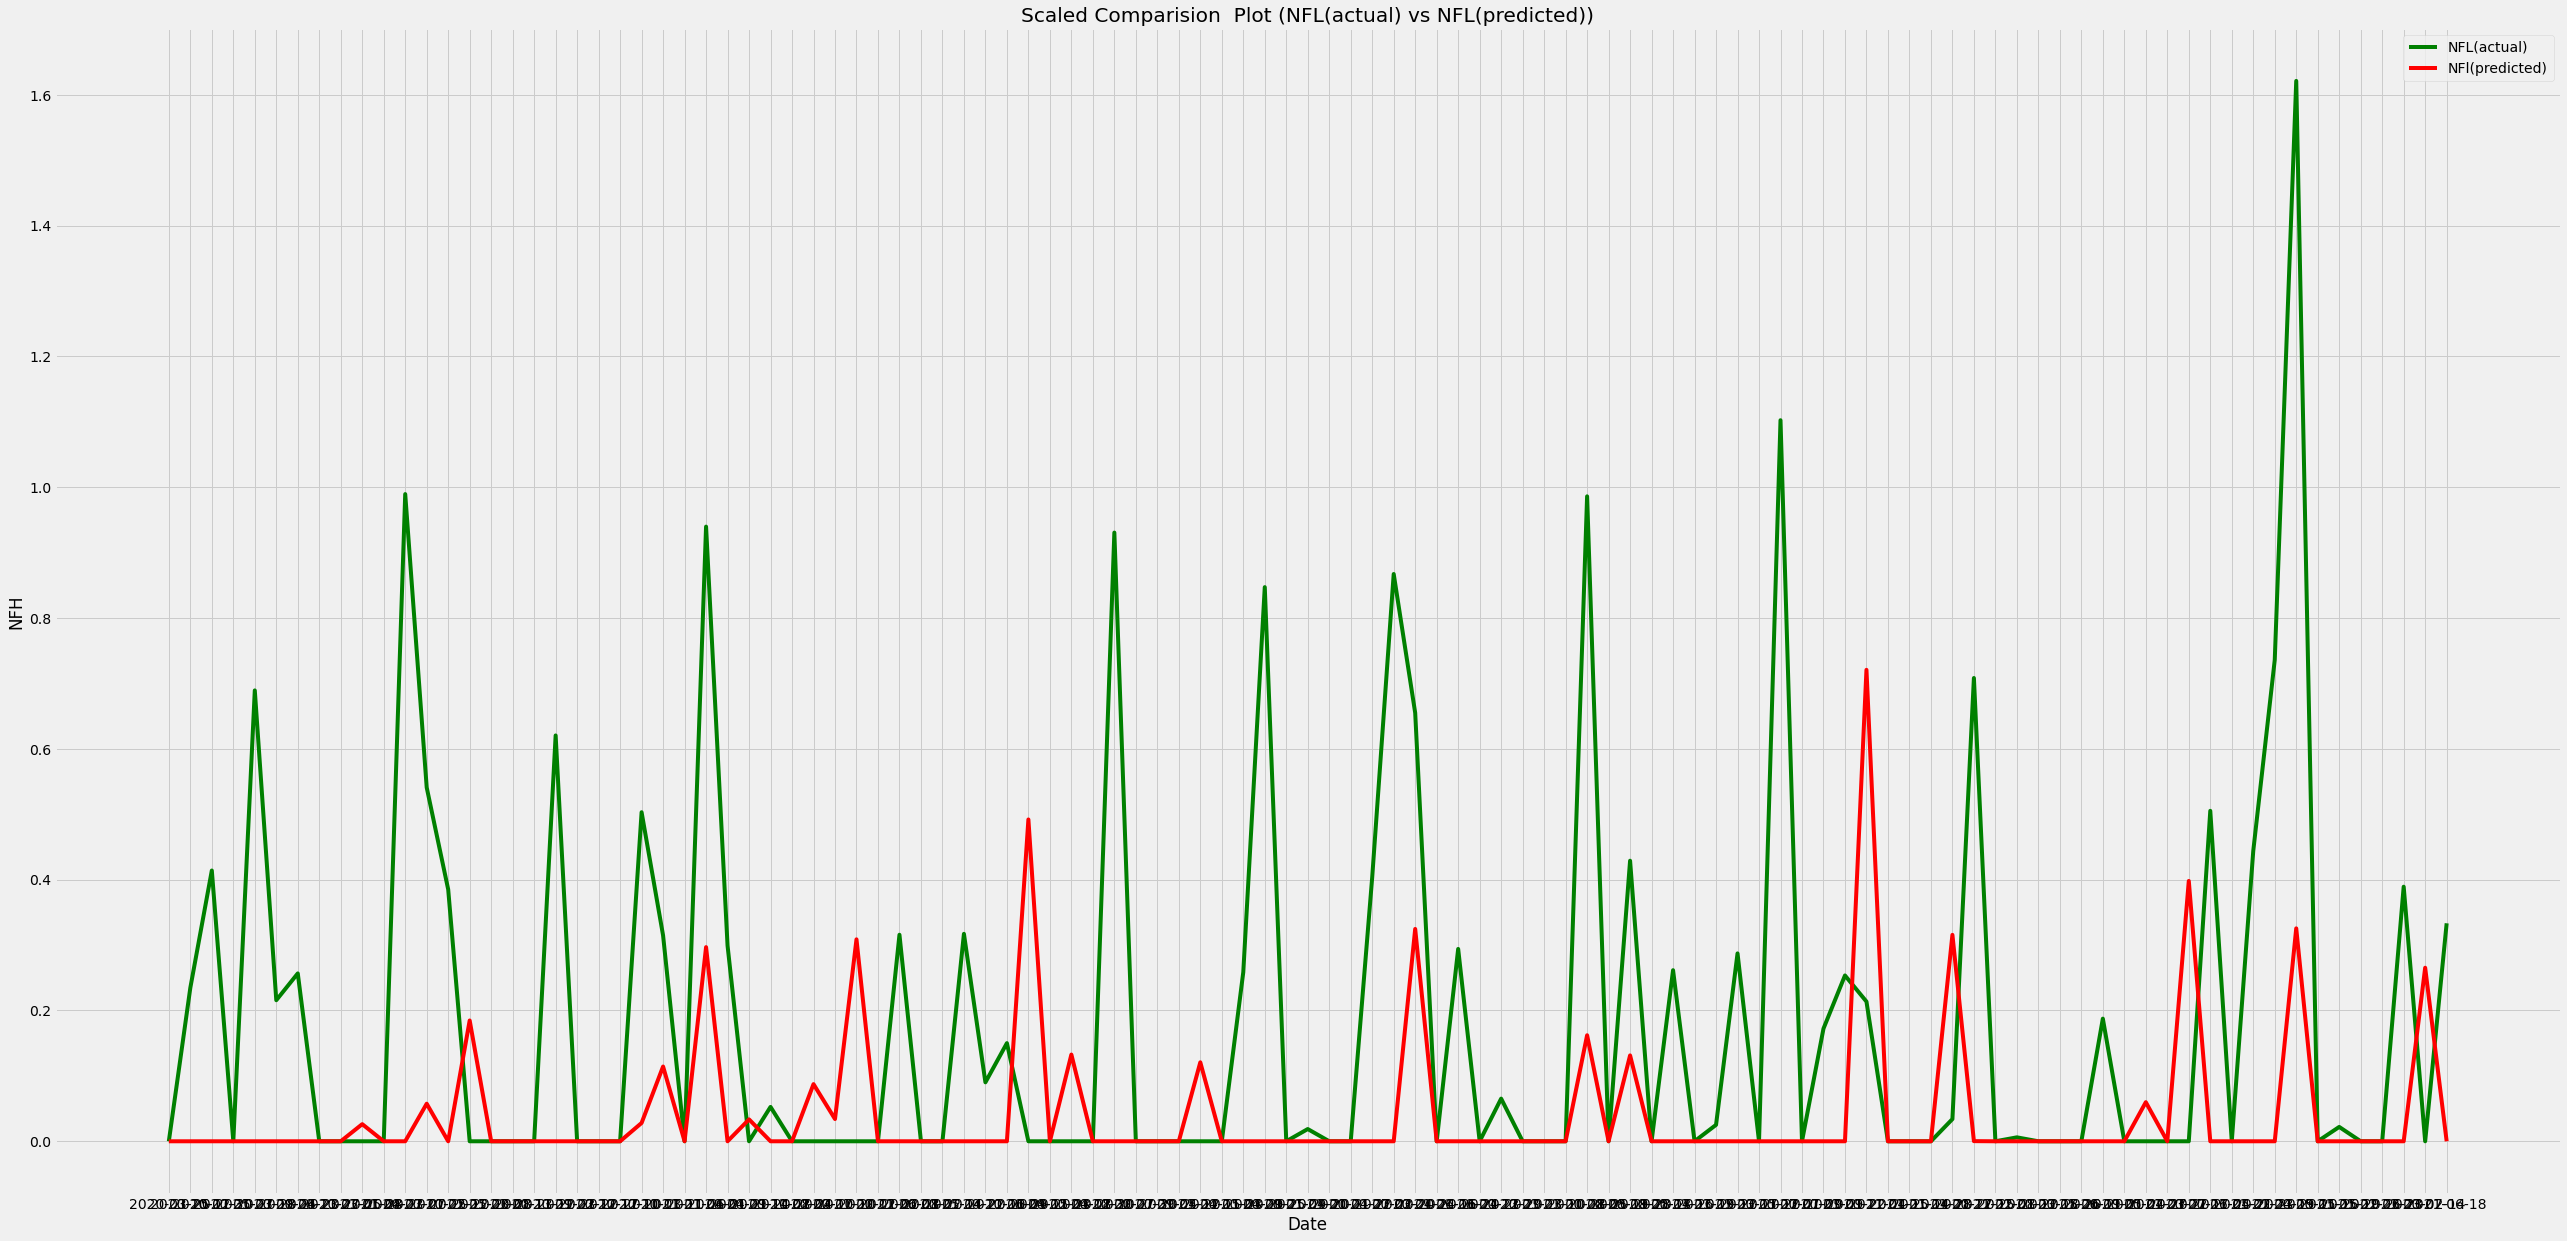

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test,label='NFL(actual)',color='green')
plt.plot(date,yhat,label='NFl(predicted)',color='red')
plt.grid(True)
plt.title('Scaled Comparision  Plot (NFL(actual) vs NFL(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH')
plt.style.use('fivethirtyeight')
plt.show()


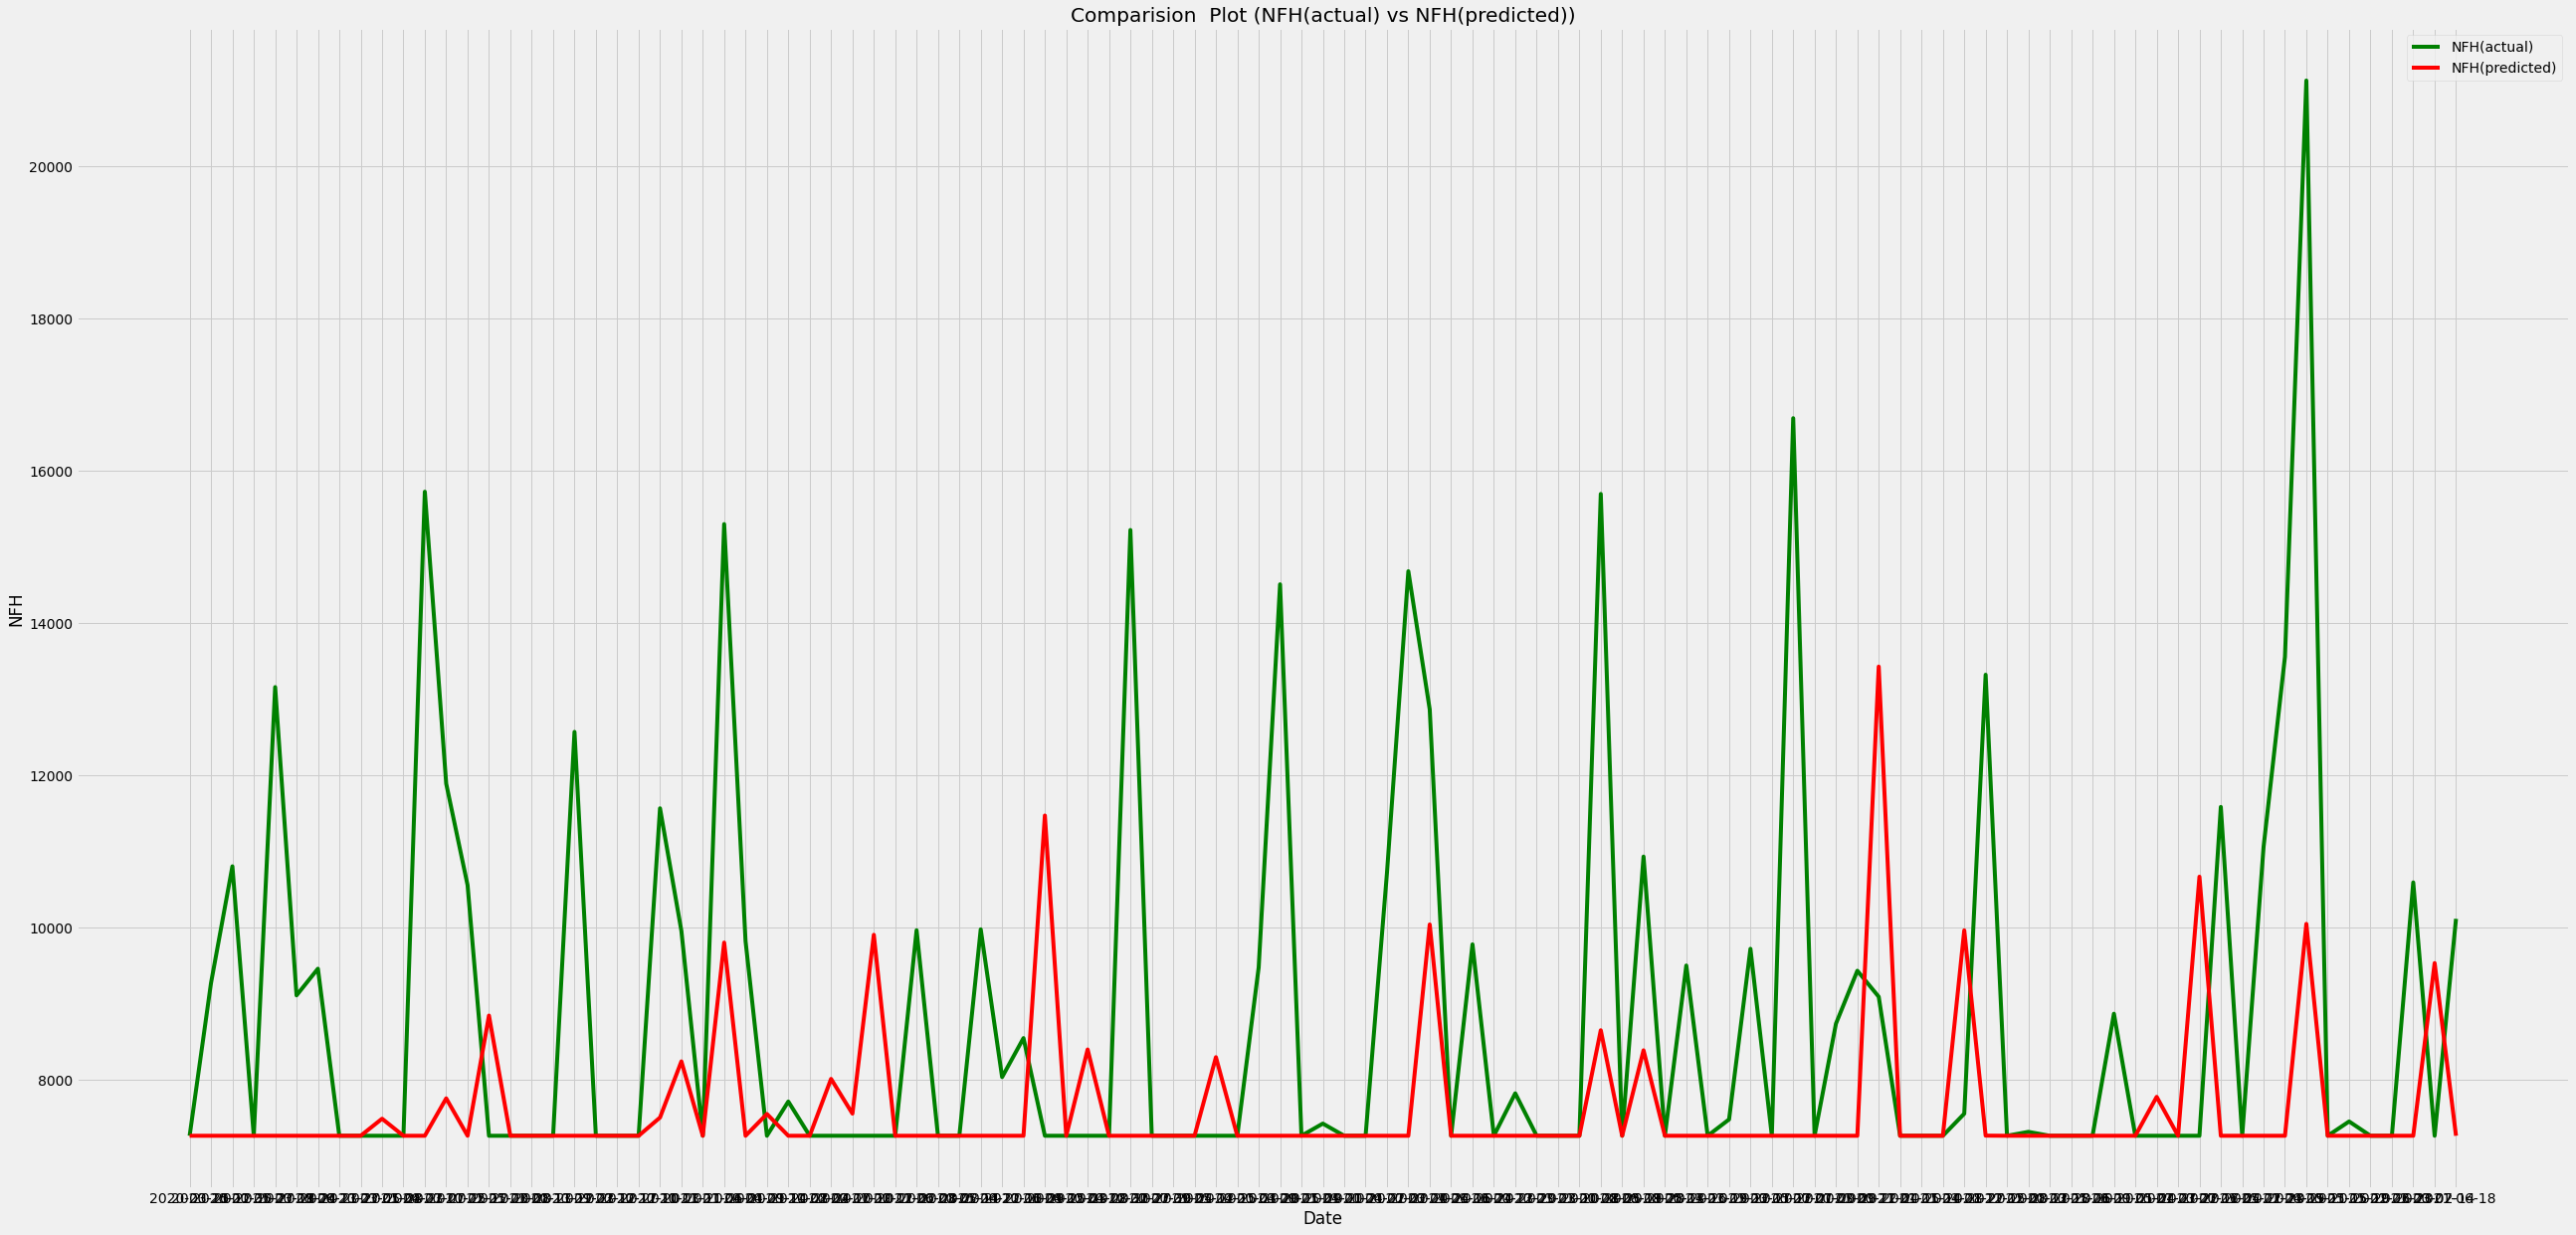

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test1,label='NFH(actual)',color='green')
plt.plot(date,yhat1,label='NFH(predicted)',color='red')
plt.grid(True)
plt.title('Comparision  Plot (NFH(actual) vs NFH(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH')
plt.style.use('fivethirtyeight')
plt.show()

## **Independent Model Analysis**



### **NFH Training/Prediction**

In [ ]:
df=pd.read_csv('csv_nfl_data.csv')
df=process(df)
df


,Date(IST),NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh,nfl
1,2020-01-02,0.550682,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,0.537827,0.571552
2,2020-01-03,0.560137,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,0.549968,0.574100
3,2020-01-06,0.569330,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,0.552886,0.575098
4,2020-01-07,0.565106,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,0.545863,0.557377
5,2020-01-08,0.554650,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,0.539722,0.552135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-06-24,0.991474,0.978029,0.063734,0.123039,0.145925,0.302320,0.279636,1138.76,0.063936,0.573867,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,0.993836,0.983483
353,2021-06-25,0.985429,0.984289,0.059193,0.083988,0.205656,0.432029,0.378875,1832.76,0.091081,0.387393,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000,0.990768,0.986924
354,2021-06-28,0.991094,0.993188,0.024723,0.060763,0.179197,0.325005,0.294814,1277.08,0.090986,0.412344,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000,0.993554,0.994166
355,2021-06-29,1.000000,0.993143,0.116848,0.135800,0.227135,0.595092,0.618669,1810.05,0.075286,0.506894,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,0.998678,0.998843


In [ ]:
Df=df.copy()
df=df.drop(columns=['nfl'])
df


,Date(IST),NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh
1,2020-01-02,0.550682,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,0.537827
2,2020-01-03,0.560137,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,0.549968
3,2020-01-06,0.569330,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,0.552886
4,2020-01-07,0.565106,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,0.545863
5,2020-01-08,0.554650,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,0.539722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-06-24,0.991474,0.978029,0.063734,0.123039,0.145925,0.302320,0.279636,1138.76,0.063936,0.573867,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,0.993836
353,2021-06-25,0.985429,0.984289,0.059193,0.083988,0.205656,0.432029,0.378875,1832.76,0.091081,0.387393,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000,0.990768
354,2021-06-28,0.991094,0.993188,0.024723,0.060763,0.179197,0.325005,0.294814,1277.08,0.090986,0.412344,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000,0.993554
355,2021-06-29,1.000000,0.993143,0.116848,0.135800,0.227135,0.595092,0.618669,1810.05,0.075286,0.506894,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,0.998678


### **Train/Test Split**

In [ ]:
df_permutated = df.sample(frac=1)

train_size = 0.7# 70%-train set and 30% -test set
train_end = int(len(df_permutated)*train_size)

df_train = df_permutated[:train_end]
df_test = df_permutated[train_end:]

In [ ]:
df_train=df_train.reset_index()
df_train.to_csv('train.csv')


In [ ]:
df_train=df_train.drop(columns=['index','Date(IST)'])

In [ ]:
df_train

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh
0,0.554623,0.559290,0.007422,0.022792,0.212136,0.131930,0.177104,10.51,0.061856,0.517400,-0.14,-0.6040,-1.31,-0.43,0.1410,-0.4249,-0.09,3.669999,0.544754
1,0.028664,0.014131,0.068071,0.116518,0.165841,0.345015,0.288340,1553.66,0.063936,0.486540,-0.43,1.7380,1.89,10.13,0.0850,0.9636,2.57,0.079998,0.030809
2,0.181500,0.180470,0.129553,0.079202,0.351331,0.419291,0.230795,2841.09,0.075381,0.380827,1.95,0.8300,2.67,0.94,-0.5409,0.2449,-1.59,-0.150000,0.159274
3,0.484692,0.483111,0.241416,0.272805,0.229525,0.379383,0.550877,-100.83,0.065355,0.484570,0.38,-0.2085,-0.60,-1.99,-0.0500,-0.0563,-0.25,-0.629999,0.468159
4,0.866203,0.876690,0.082267,0.089673,0.240686,0.383995,0.486854,449.52,0.103471,0.291530,-0.77,-0.0971,-1.38,-1.81,-0.2455,-0.1660,-0.16,1.620001,0.873397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.444287,0.429747,0.149621,0.053798,0.435101,0.244119,0.358846,-135.55,0.082474,0.370978,0.06,0.6900,-0.97,-0.96,0.2756,0.1100,-0.19,-0.179998,0.422317
244,0.320196,0.318840,0.083272,0.055637,0.302428,0.147072,0.309335,-847.31,0.079069,0.378858,0.38,0.0000,1.08,-1.41,0.0828,0.1592,0.21,0.150000,0.302070
245,0.853310,0.862277,0.042740,0.085283,0.171281,0.320330,0.373387,612.8,0.031590,0.774787,-0.15,-0.0750,1.29,-0.24,0.0665,0.8800,-0.08,0.900002,0.859518
246,0.478097,0.475854,0.034482,0.042034,0.231132,0.203411,0.309563,-212.21,0.081245,0.362443,0.23,0.4100,-1.37,-0.86,-0.0580,0.4786,0.00,0.450001,0.459739


In [ ]:
X_train=df_train.iloc[:,:-1].values
y_train=df_train.iloc[:,-1].values
X_train = np.asarray(X_train).astype(np.float32)
y_train =np.array(y_train).astype(np.float32)

In [ ]:
df_test=df_test.reset_index()
df_test.to_csv('test.csv')

In [ ]:
date=df_test['Date(IST)']
df_test=df_test.drop(columns=['index','Date(IST)'])

In [ ]:
df_test

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh
0,0.813531,0.801525,0.147839,0.079317,0.386803,0.250564,0.655676,-2372.54,0.091459,0.377544,-0.21,0.0692,-0.30,2.01,-0.1293,0.3506,-0.80,-0.810001,0.804795
1,0.998188,0.993181,0.058657,0.086480,0.200231,0.278414,0.385433,45.24,0.054857,0.664478,-1.41,-0.2050,-2.05,2.44,0.8465,-0.3900,-1.42,-0.400000,1.000000
2,0.448999,0.441397,0.041797,0.027470,0.270983,0.165001,0.346251,-931.91,0.087865,0.333552,0.26,-0.3366,-1.52,-2.69,0.2119,-0.1719,-0.53,1.760000,0.426929
3,0.436220,0.435138,0.049068,0.056196,0.234714,0.131165,0.233709,-438.62,0.102998,0.230466,1.81,-0.1155,0.58,2.17,0.1050,-0.2498,-0.63,-0.440001,0.421105
4,0.326827,0.320769,0.029014,0.038529,0.226622,0.139661,0.183609,47.29,0.140074,0.000000,2.74,0.6000,1.26,1.97,0.1670,0.7015,-0.14,-1.289999,0.305577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1.000000,0.993143,0.116848,0.135800,0.227135,0.595092,0.618669,1810.05,0.075286,0.506894,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,0.998678
103,0.213704,0.230344,0.316944,0.337398,0.263428,0.547069,0.657190,967.43,0.099877,0.210112,-1.27,-0.0240,-0.11,2.09,-0.0930,0.5025,0.05,-1.080000,0.202123
104,0.876216,0.868700,0.046600,0.099655,0.153569,0.308194,0.355699,613.26,0.061856,0.596192,1.98,0.9494,2.23,6.00,-0.2935,-0.2190,0.49,-8.780001,0.872019
105,0.901797,0.903741,0.078341,0.093728,0.225904,0.244422,0.454447,-876.06,0.078975,0.458306,0.03,0.6223,-0.29,2.52,-0.1650,-0.3586,0.22,-1.510000,0.906243


In [ ]:
X_test=df_test.iloc[:,:-1].values
y_test=df_test.iloc[:,-1].values
X_test = np.asarray(X_test).astype(np.float32)
y_test =np.array(y_test).astype(np.float32)

### **Hyper tuning of Model for NFH training/Prediction**

In [ ]:
tuner2 = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=7,
    executions_per_trial=2,
    directory=os.path.normpath('IDM/NFH:/keras_tuning'),
    project_name='timeseries_bayes_opt_POC',
    overwrite=True)

In [ ]:
def tune_model2(X_train,y_train,y_test,X_test):
  tuner2.search(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))
  bayes_opt_model_best_model = tuner2.get_best_models(num_models=1)
  model = bayes_opt_model_best_model[0]
  print("the best model is given by {}".format(model))
  model.fit(X_train, y_train, epochs=5, batch_size=250, verbose=0)
  return model

In [ ]:
model=tune_model2(X_train,y_train,y_test,X_test)

Trial 7 Complete [00h 02m 05s]
val_loss: 0.40774865448474884

Best val_loss So Far: 0.37704427540302277
Total elapsed time: 00h 15m 06s
INFO:tensorflow:Oracle triggered exit
the best model is given by <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f58c730e8d0>


### **Model Prediction**

In [ ]:
yhat = model.predict(X_test, verbose=0)

In [ ]:
yhat

array([[0.4338302 ],
       [0.        ],
       [0.05905146],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.29586595],
       [0.6346664 ],
       [0.42764658],
       [0.49299556],
       [0.99623865],
       [0.75560755],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.3059234 ],
       [0.        ],
       [1.2117538 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.05876154],
       [0.55920404],
       [0.        ],
       [0.        ],
       [0.27958292],
       [0.07432932],
       [0.        ],
       [0.44837183],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.0888596 ],
       [0.2085647 ],
       [0.04380412],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.07487101],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [ ]:
y_test1=sc.inverse_transform(y_test.reshape(-1,1))

In [ ]:
yhat1=sc.inverse_transform(yhat.reshape(-1,1))

### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(y_test, yhat)
print(score)

0.34195086


In [ ]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(y_test1, yhat1)
print(score)

24997774.0


### **Data Visualization**

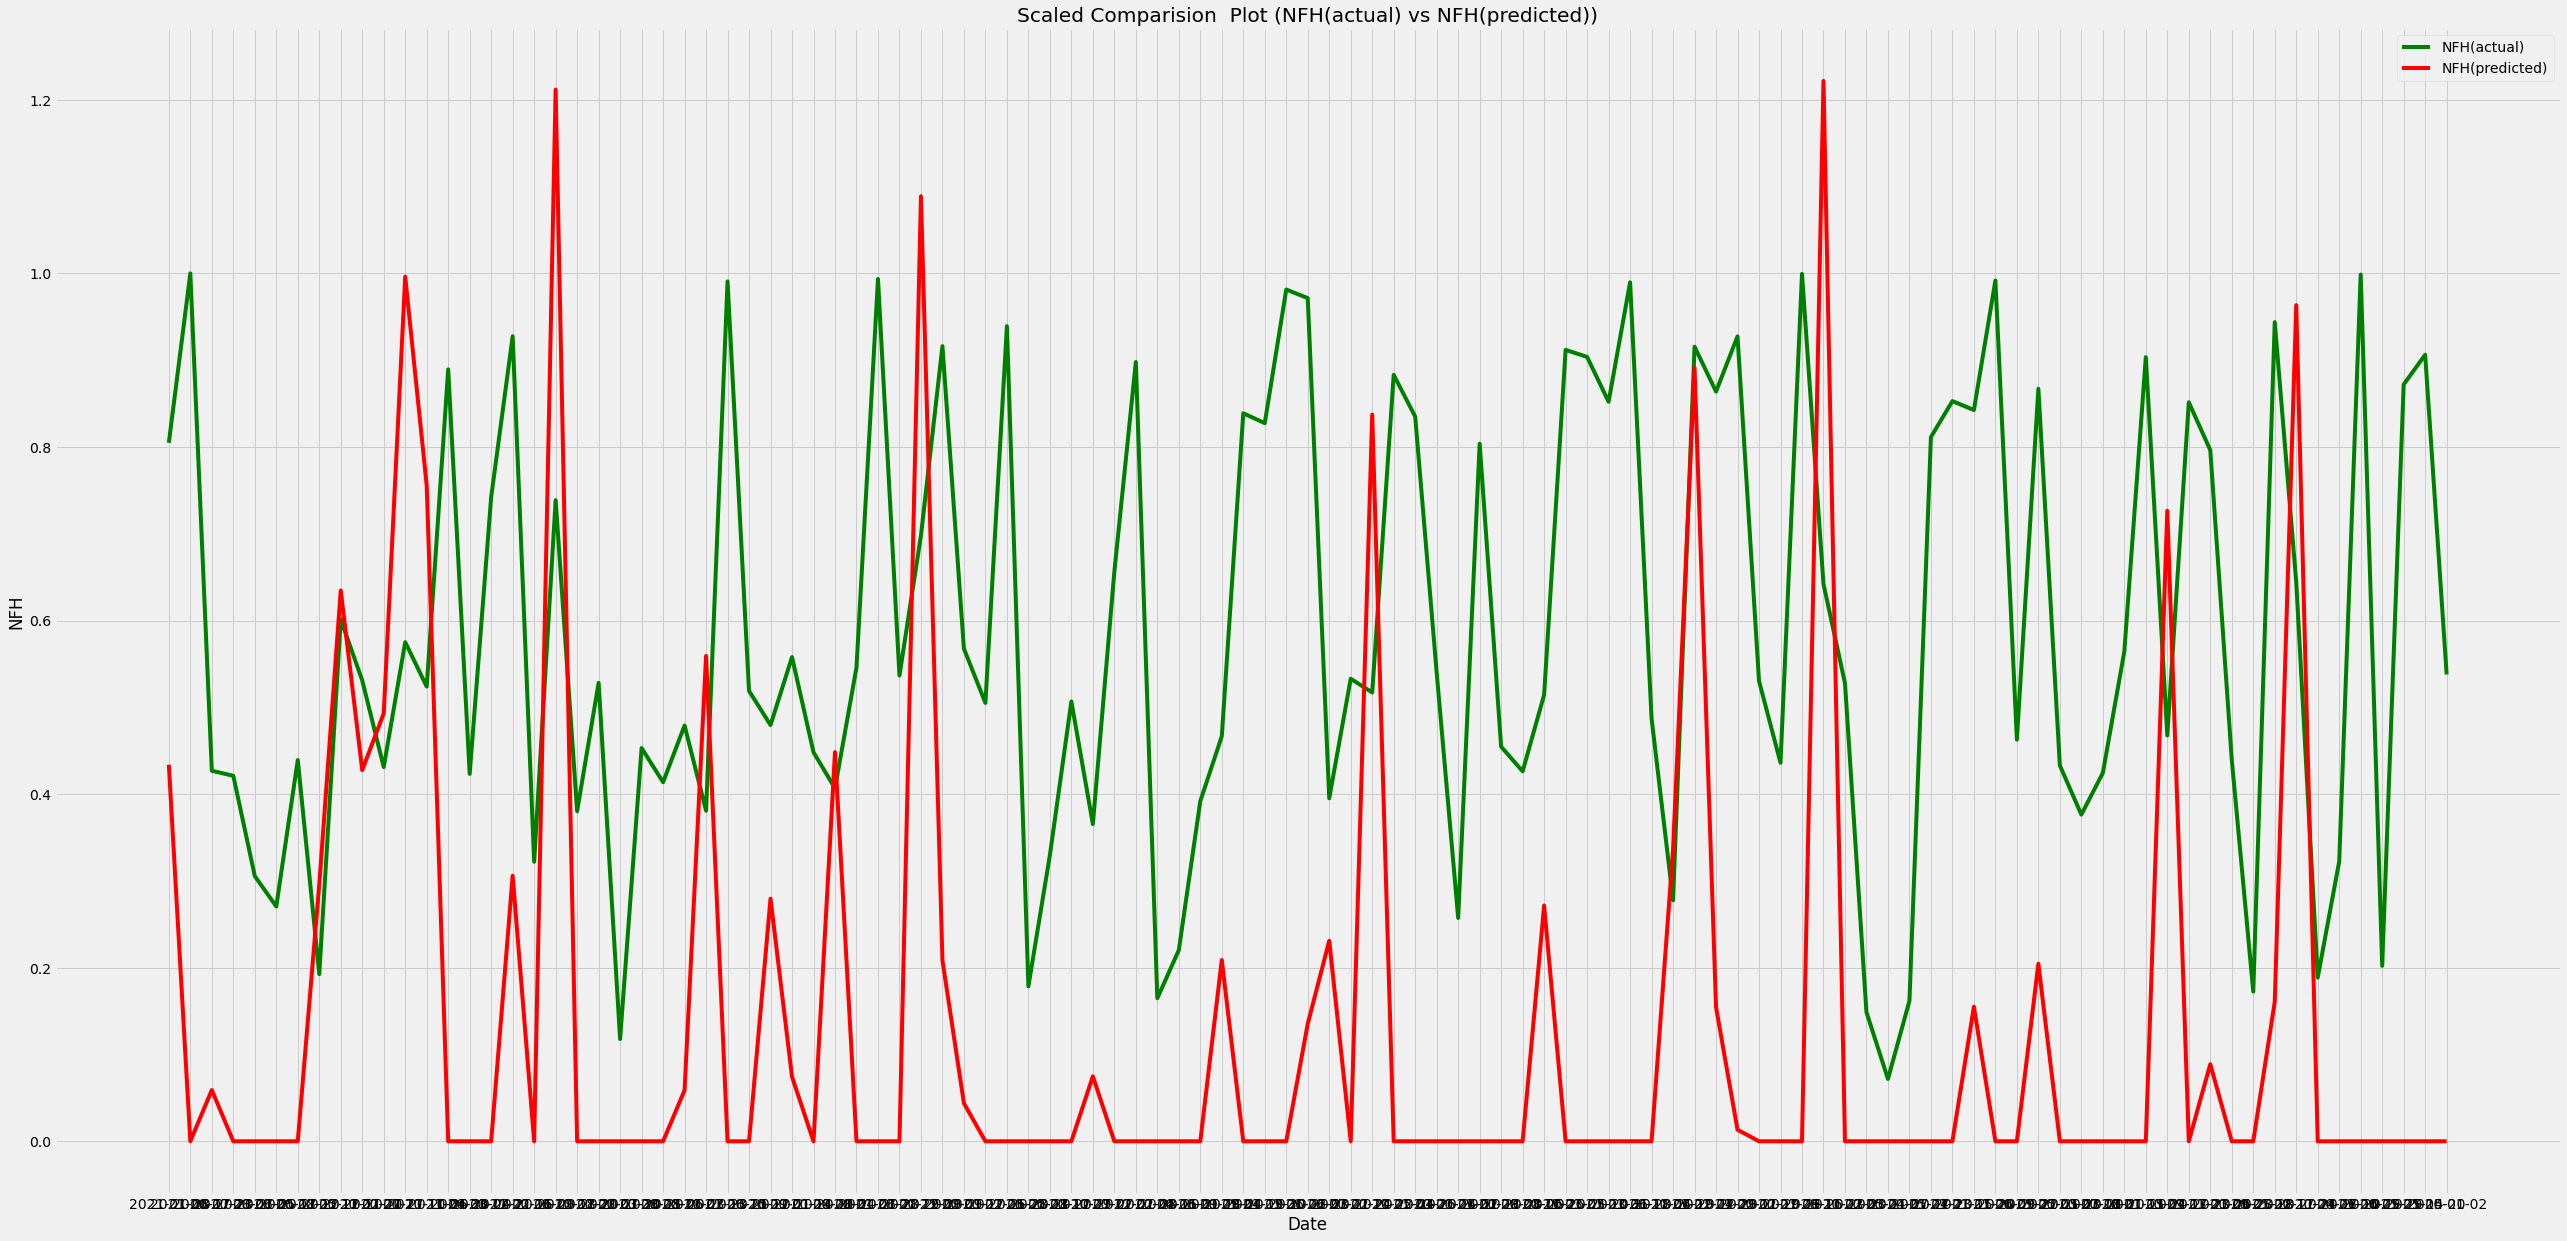

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test,label='NFH(actual)',color='green')
plt.plot(date,yhat,label='NFH(predicted)',color='red')
plt.grid(True)
plt.title('Scaled Comparision  Plot (NFH(actual) vs NFH(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH')
plt.style.use('fivethirtyeight')
plt.show()


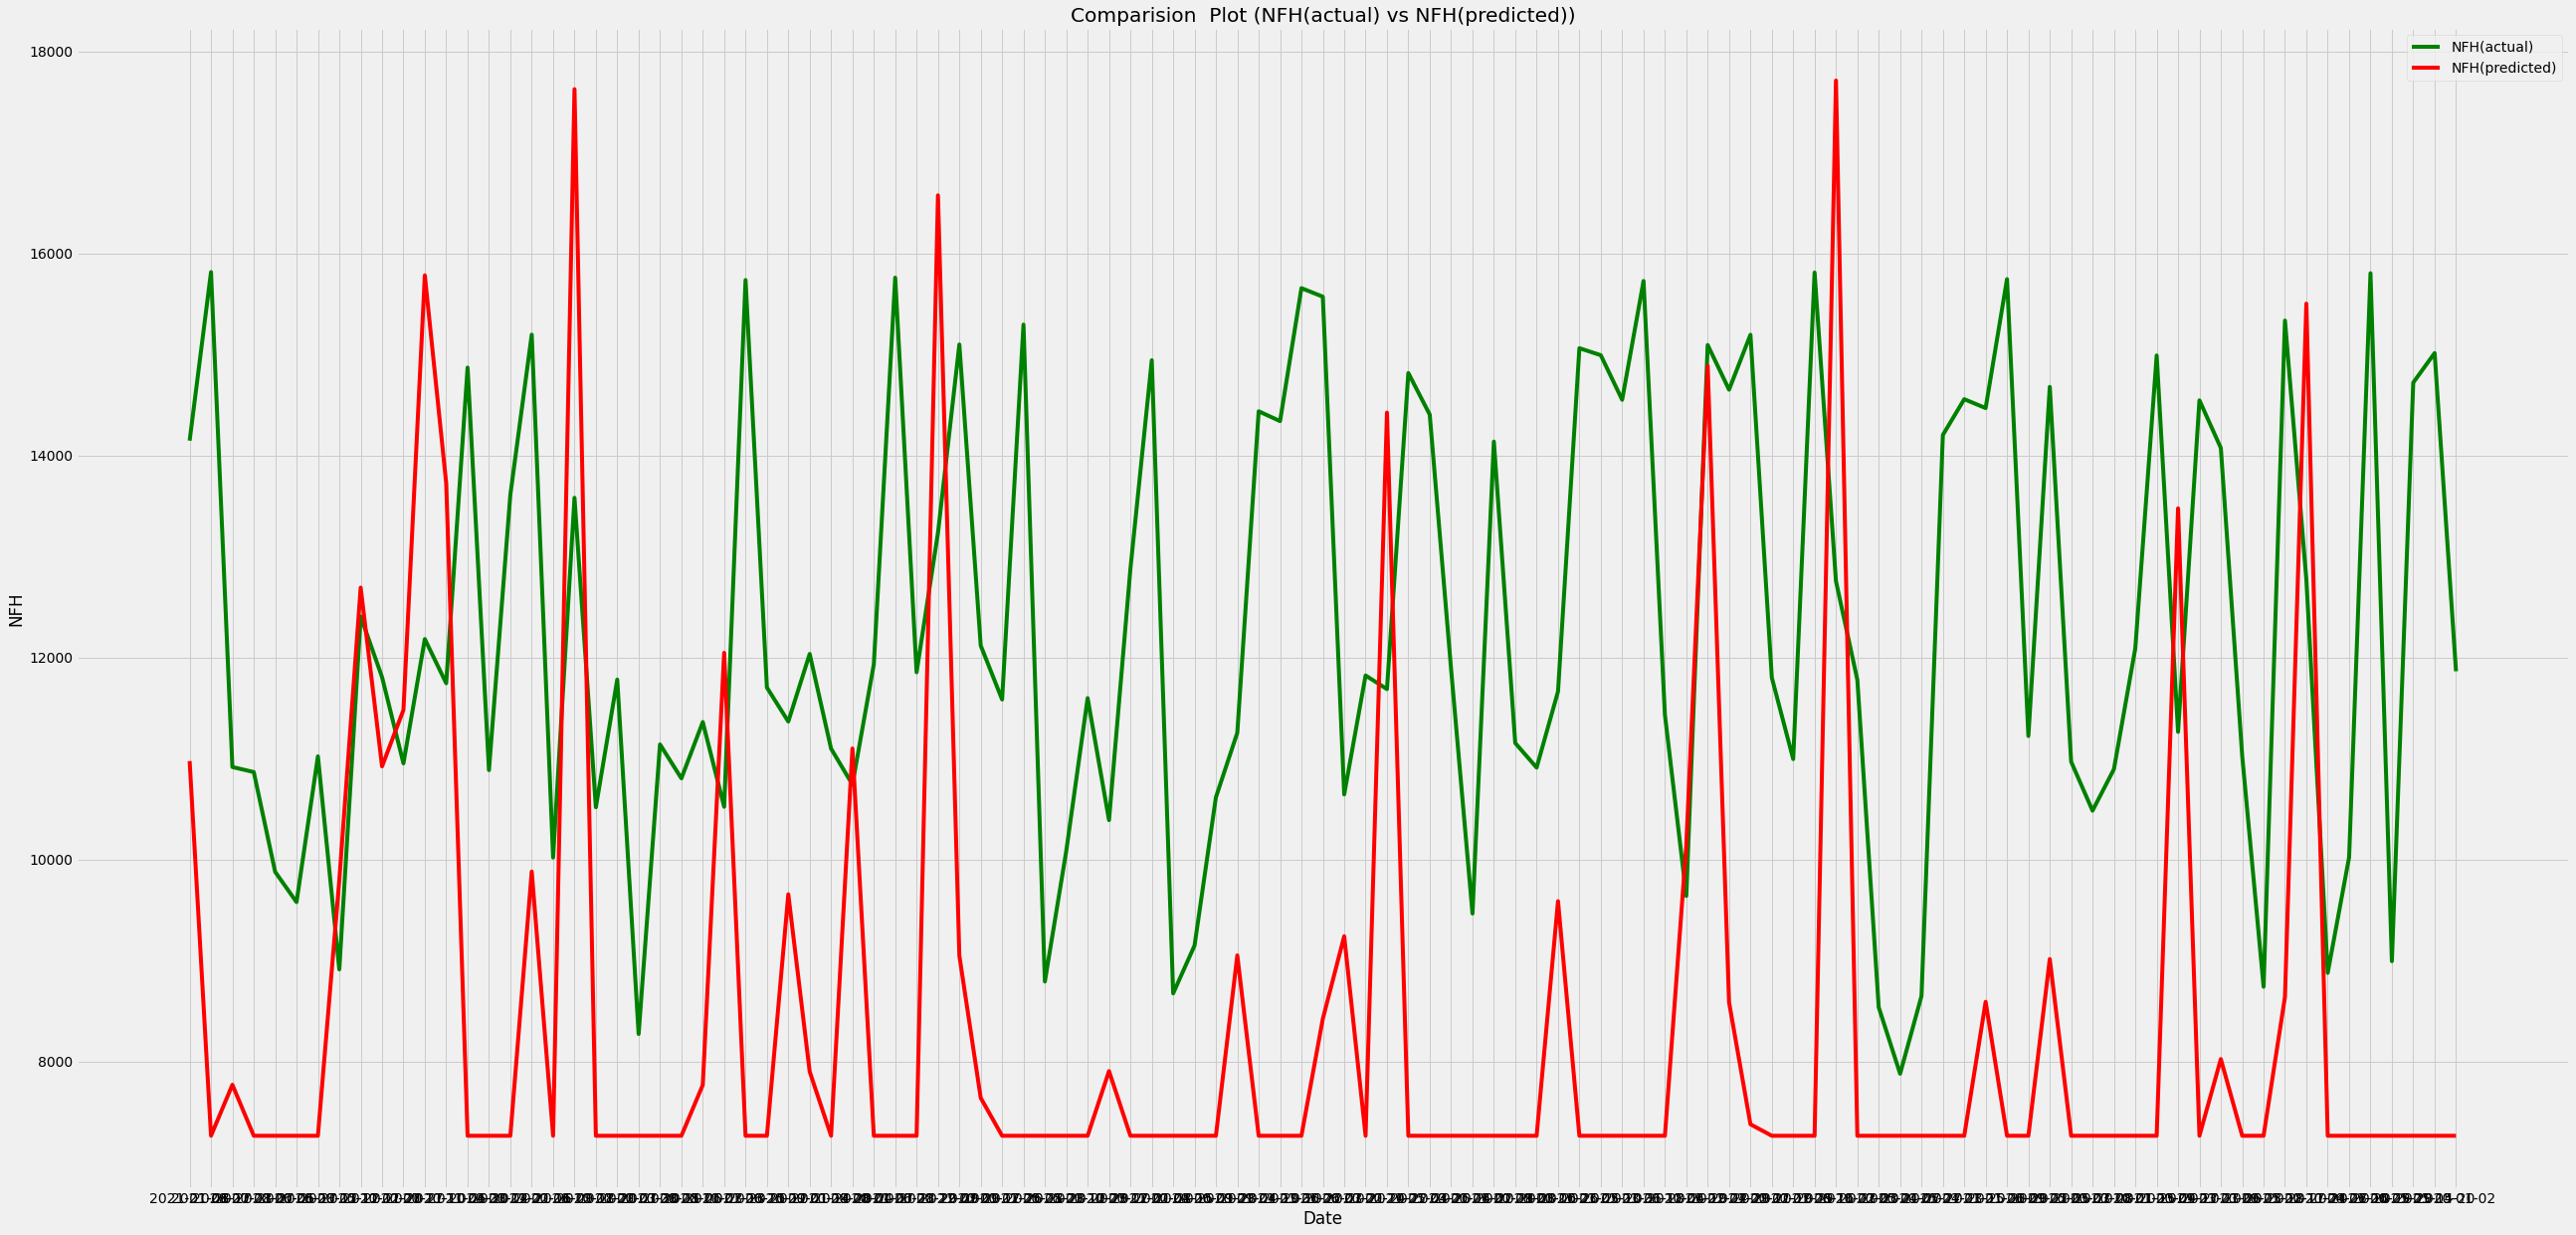

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test1,label='NFH(actual)',color='green')
plt.plot(date,yhat1,label='NFH(predicted)',color='red')
plt.grid(True)
plt.title('Comparision  Plot (NFH(actual) vs NFH(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH')
plt.style.use('fivethirtyeight')
plt.show()

### **NFL Training/Prediction**

In [ ]:
df=Df.copy()

In [ ]:
df['dum']=0
df['NFL']=df['nfl']
df=df.drop(columns=['nfl'])

### **Train/Test Split**

In [ ]:
df_permutated = df.sample(frac=1)

train_size = 0.7# 70%-train set and 30% -test set
train_end = int(len(df_permutated)*train_size)

df_train = df_permutated[:train_end]
df_test = df_permutated[train_end:]

In [ ]:
df_train=df_train.reset_index()
df_train.to_csv('train.csv')

In [ ]:
df_train=df_train.drop(columns=['index','Date(IST)','nfh'])

In [ ]:
df_train

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,dum,NFL
0,0.898809,0.902092,0.055992,0.070236,0.223562,0.185729,0.199078,447.67,0.092027,0.353907,1.49,0.2150,1.83,-2.10,-0.0305,0.2607,0.13,-1.470001,0,0.899043
1,0.455247,0.445964,0.040414,0.035250,0.254622,0.082537,0.155457,-379.38,0.115199,0.156271,-1.14,0.1350,0.25,-0.26,-0.1200,-0.0700,-0.09,0.160000,0,0.455894
2,0.330668,0.335075,0.287122,0.324132,0.228548,0.247075,0.287318,454.48,0.121158,0.131320,-0.56,0.4450,-0.39,-1.11,-0.2745,-0.0430,0.23,-0.400000,0,0.347558
3,0.894476,0.892252,0.121682,0.099887,0.299642,0.376503,0.373074,1250.22,0.060248,0.588313,-0.79,0.3350,-1.18,1.66,-0.4190,-0.2007,0.49,-1.439999,0,0.898306
4,0.929861,0.924929,0.036327,0.044437,0.230510,0.147171,0.256956,-438.59,0.107538,0.279054,0.66,-0.2333,0.53,1.14,-0.0510,0.1400,0.00,-1.480000,0,0.929273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.453237,0.459560,0.041236,0.035529,0.255735,0.092382,0.214082,-724.31,0.082758,0.365726,-0.26,0.2153,1.15,0.79,0.0500,0.0991,-0.36,-2.839998,0,0.466792
244,0.349649,0.332502,0.055539,0.061946,0.237239,0.184290,0.348753,-733.33,0.062991,0.540381,-0.80,-0.4800,-1.49,-1.21,0.0450,0.1592,0.77,1.760000,0,0.349253
245,0.398567,0.398454,0.041297,0.068967,0.197122,0.155831,0.322843,-853.41,0.066679,0.521996,-0.39,0.0680,-1.34,1.23,0.1137,0.1900,0.70,-1.350000,0,0.408627
246,0.404955,0.404699,0.026644,0.037811,0.223257,0.095628,0.056026,542.34,0.126738,0.096520,0.91,0.7800,1.44,1.34,0.1155,0.1100,0.06,-0.189999,0,0.408366


In [ ]:
X_train=df_train.iloc[:,:-1].values
y_train=df_train.iloc[:,-1].values
X_train = np.asarray(X_train).astype(np.float32)
y_train =np.array(y_train).astype(np.float32)

In [ ]:
df_test=df_test.reset_index()
df_test.to_csv('test.csv')

In [ ]:
date=df_test['Date(IST)']
df_test=df_test.drop(columns=['index','Date(IST)','nfh'])

In [ ]:
df_test

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,dum,NFL
0,0.181500,0.180470,0.129553,0.079202,0.351331,0.419291,0.230795,2841.09,0.075381,0.380827,1.950,0.8300,2.67,0.94,-0.5409,0.2449,-1.59,-0.150000,0,0.196723
1,0.920725,0.927869,0.024397,0.035475,0.222978,0.149285,0.280464,-597.62,0.070652,0.490479,-0.060,0.1251,0.48,-0.38,-0.0720,0.4050,-0.04,-1.280001,0,0.928219
2,0.351218,0.346728,0.020417,0.060259,0.171681,0.210268,0.159104,1036.13,0.057316,0.589626,1.195,0.1200,1.18,1.73,-0.1230,0.3768,0.26,-2.949999,0,0.361835
3,0.076380,0.061243,0.059195,0.144624,0.099158,0.595552,0.290698,4367.43,0.099215,0.271175,-2.060,0.0250,-0.68,-7.50,0.5330,-0.3427,-0.20,-5.959999,0,0.054598
4,0.444287,0.429747,0.149621,0.053798,0.435101,0.244119,0.358846,-135.55,0.082474,0.370978,0.060,0.6900,-0.97,-0.96,0.2756,0.1100,-0.19,-0.179998,0,0.446414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.669700,0.654754,0.122457,0.093982,0.311526,0.148992,0.337298,-1043.21,0.112267,0.222587,-0.600,0.2933,-1.87,2.79,-0.5152,-0.2550,1.14,-0.070000,0,0.666241
103,0.384297,0.360008,0.100091,0.173024,0.129064,0.476400,0.314478,2835.46,0.064126,0.515430,-0.960,-0.5200,-2.54,-6.40,-0.5155,0.6151,-1.14,-0.559998,0,0.363256
104,0.496369,0.490813,0.060003,0.063065,0.243984,0.164180,0.293921,-533.97,0.055992,0.552200,0.750,0.2900,2.33,2.19,-0.1191,0.4406,0.43,-0.889999,0,0.499282
105,0.115090,0.073916,0.108675,0.117110,0.244015,0.282743,0.343239,422.51,0.136953,0.016415,1.500,1.6930,4.36,5.72,-0.5805,0.2857,0.36,-0.099998,0,0.100751


In [ ]:
X_test=df_test.iloc[:,:-1].values
y_test=df_test.iloc[:,-1].values
X_test = np.asarray(X_test).astype(np.float32)
y_test =np.array(y_test).astype(np.float32)

### **Hyper tuning of Model for NFL training/Prediction**

In [ ]:
tuner3 = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=7,
    executions_per_trial=2,
    directory=os.path.normpath('IDM/NFL:/keras_tuning'),
    project_name='timeseries_bayes_opt_POC',
    overwrite=True)

In [ ]:
def tune_model3(X_train,y_train,y_test,X_test):
  tuner3.search(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))
  bayes_opt_model_best_model = tuner1.get_best_models(num_models=1)
  model = bayes_opt_model_best_model[0]
  print("the best model is given by {}".format(model))
  model.fit(X_train, y_train, epochs=5, batch_size=250, verbose=0)
  return model

In [ ]:
model=tune_model3(X_train,y_train,y_test,X_test)

Trial 7 Complete [00h 02m 15s]
val_loss: 0.27195045351982117

Best val_loss So Far: 0.27195045351982117
Total elapsed time: 00h 14m 20s
INFO:tensorflow:Oracle triggered exit
the best model is given by <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f58c884ac50>


### **Model Prediction**

In [ ]:
yhat = model.predict(X_test, verbose=0)

In [ ]:
yhat

array([[0.        ],
       [0.13449578],
       [0.        ],
       [0.        ],
       [0.03000955],
       [0.35597566],
       [0.13067918],
       [0.        ],
       [0.03496365],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.20263605],
       [0.17984478],
       [0.        ],
       [0.04869895],
       [0.10780625],
       [0.26631263],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.06590562],
       [0.        ],
       [0.30084231],
       [0.        ],
       [0.18643098],
       [0.10179619],
       [0.        ],
       [0.34696344],
       [0.37745336],
       [0.        ],
       [0.14705662],
       [0.31244949],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.03333573],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.06657144],
       [0.11738066],
       [0.        ],
       [0.12928395],
       [0.015

In [ ]:
y_test1=sc.inverse_transform(y_test.reshape(-1,1))

In [ ]:
yhat1=sc.inverse_transform(yhat.reshape(-1,1))

### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(y_test, yhat)
print(score)

0.31613782


In [ ]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(y_test1, yhat1)
print(score)

23110752.0


### **Data Visualization**

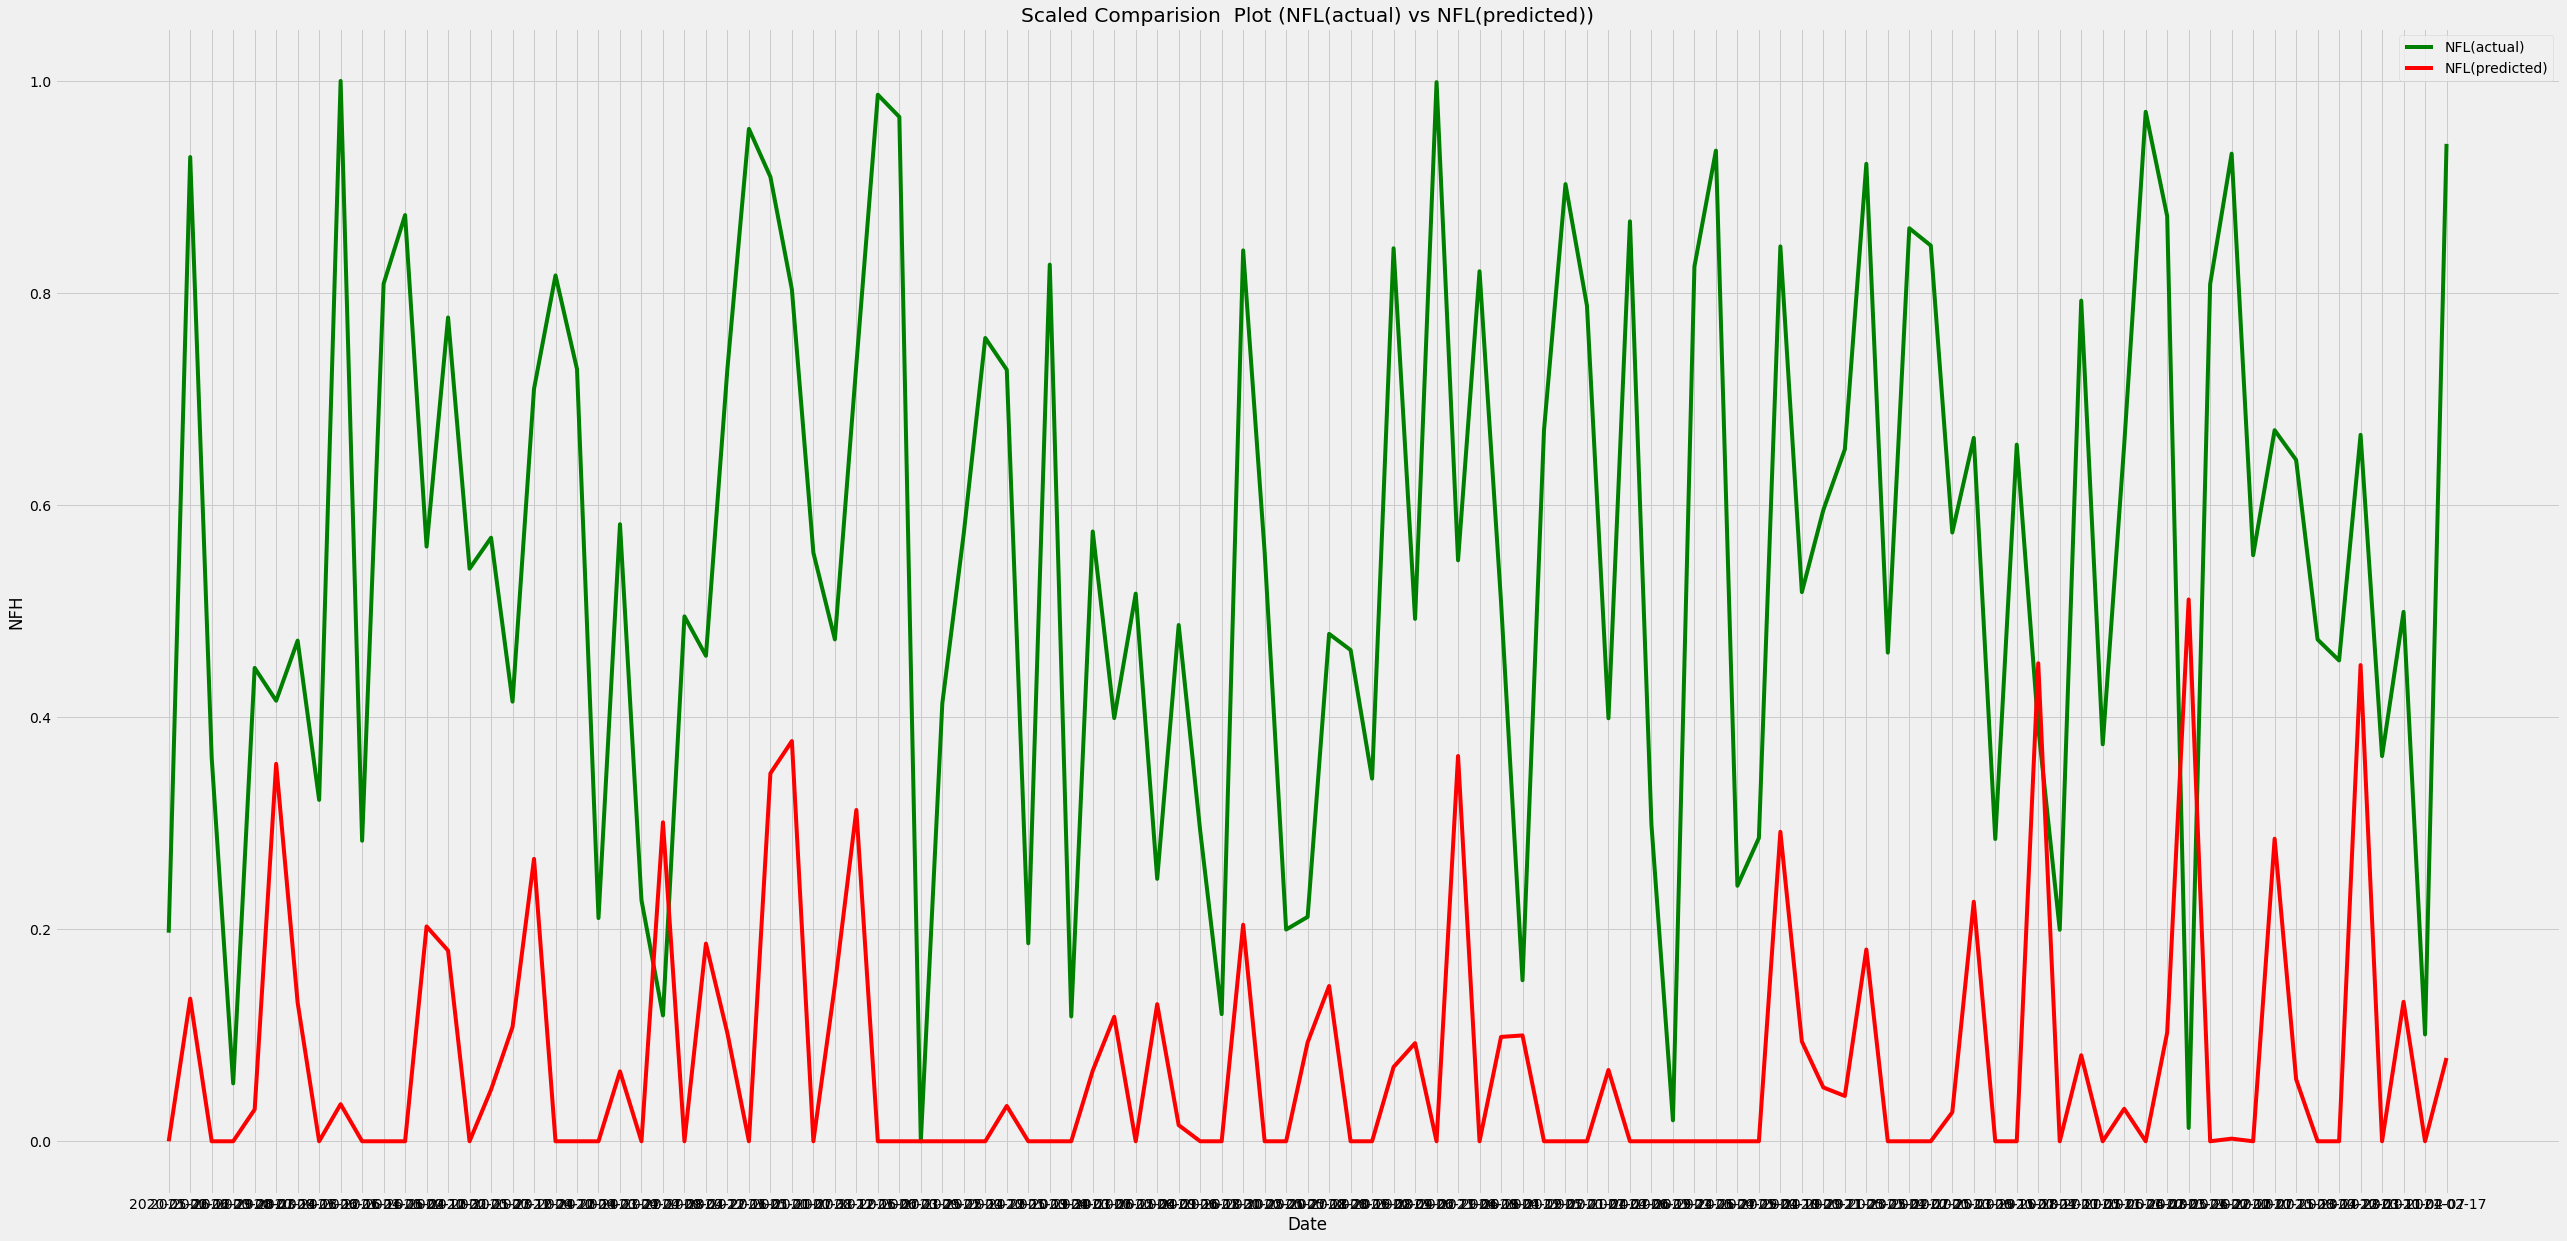

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test,label='NFL(actual)',color='green')
plt.plot(date,yhat,label='NFL(predicted)',color='red')
plt.grid(True)
plt.title('Scaled Comparision  Plot (NFL(actual) vs NFL(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH')
plt.style.use('fivethirtyeight')
plt.show()


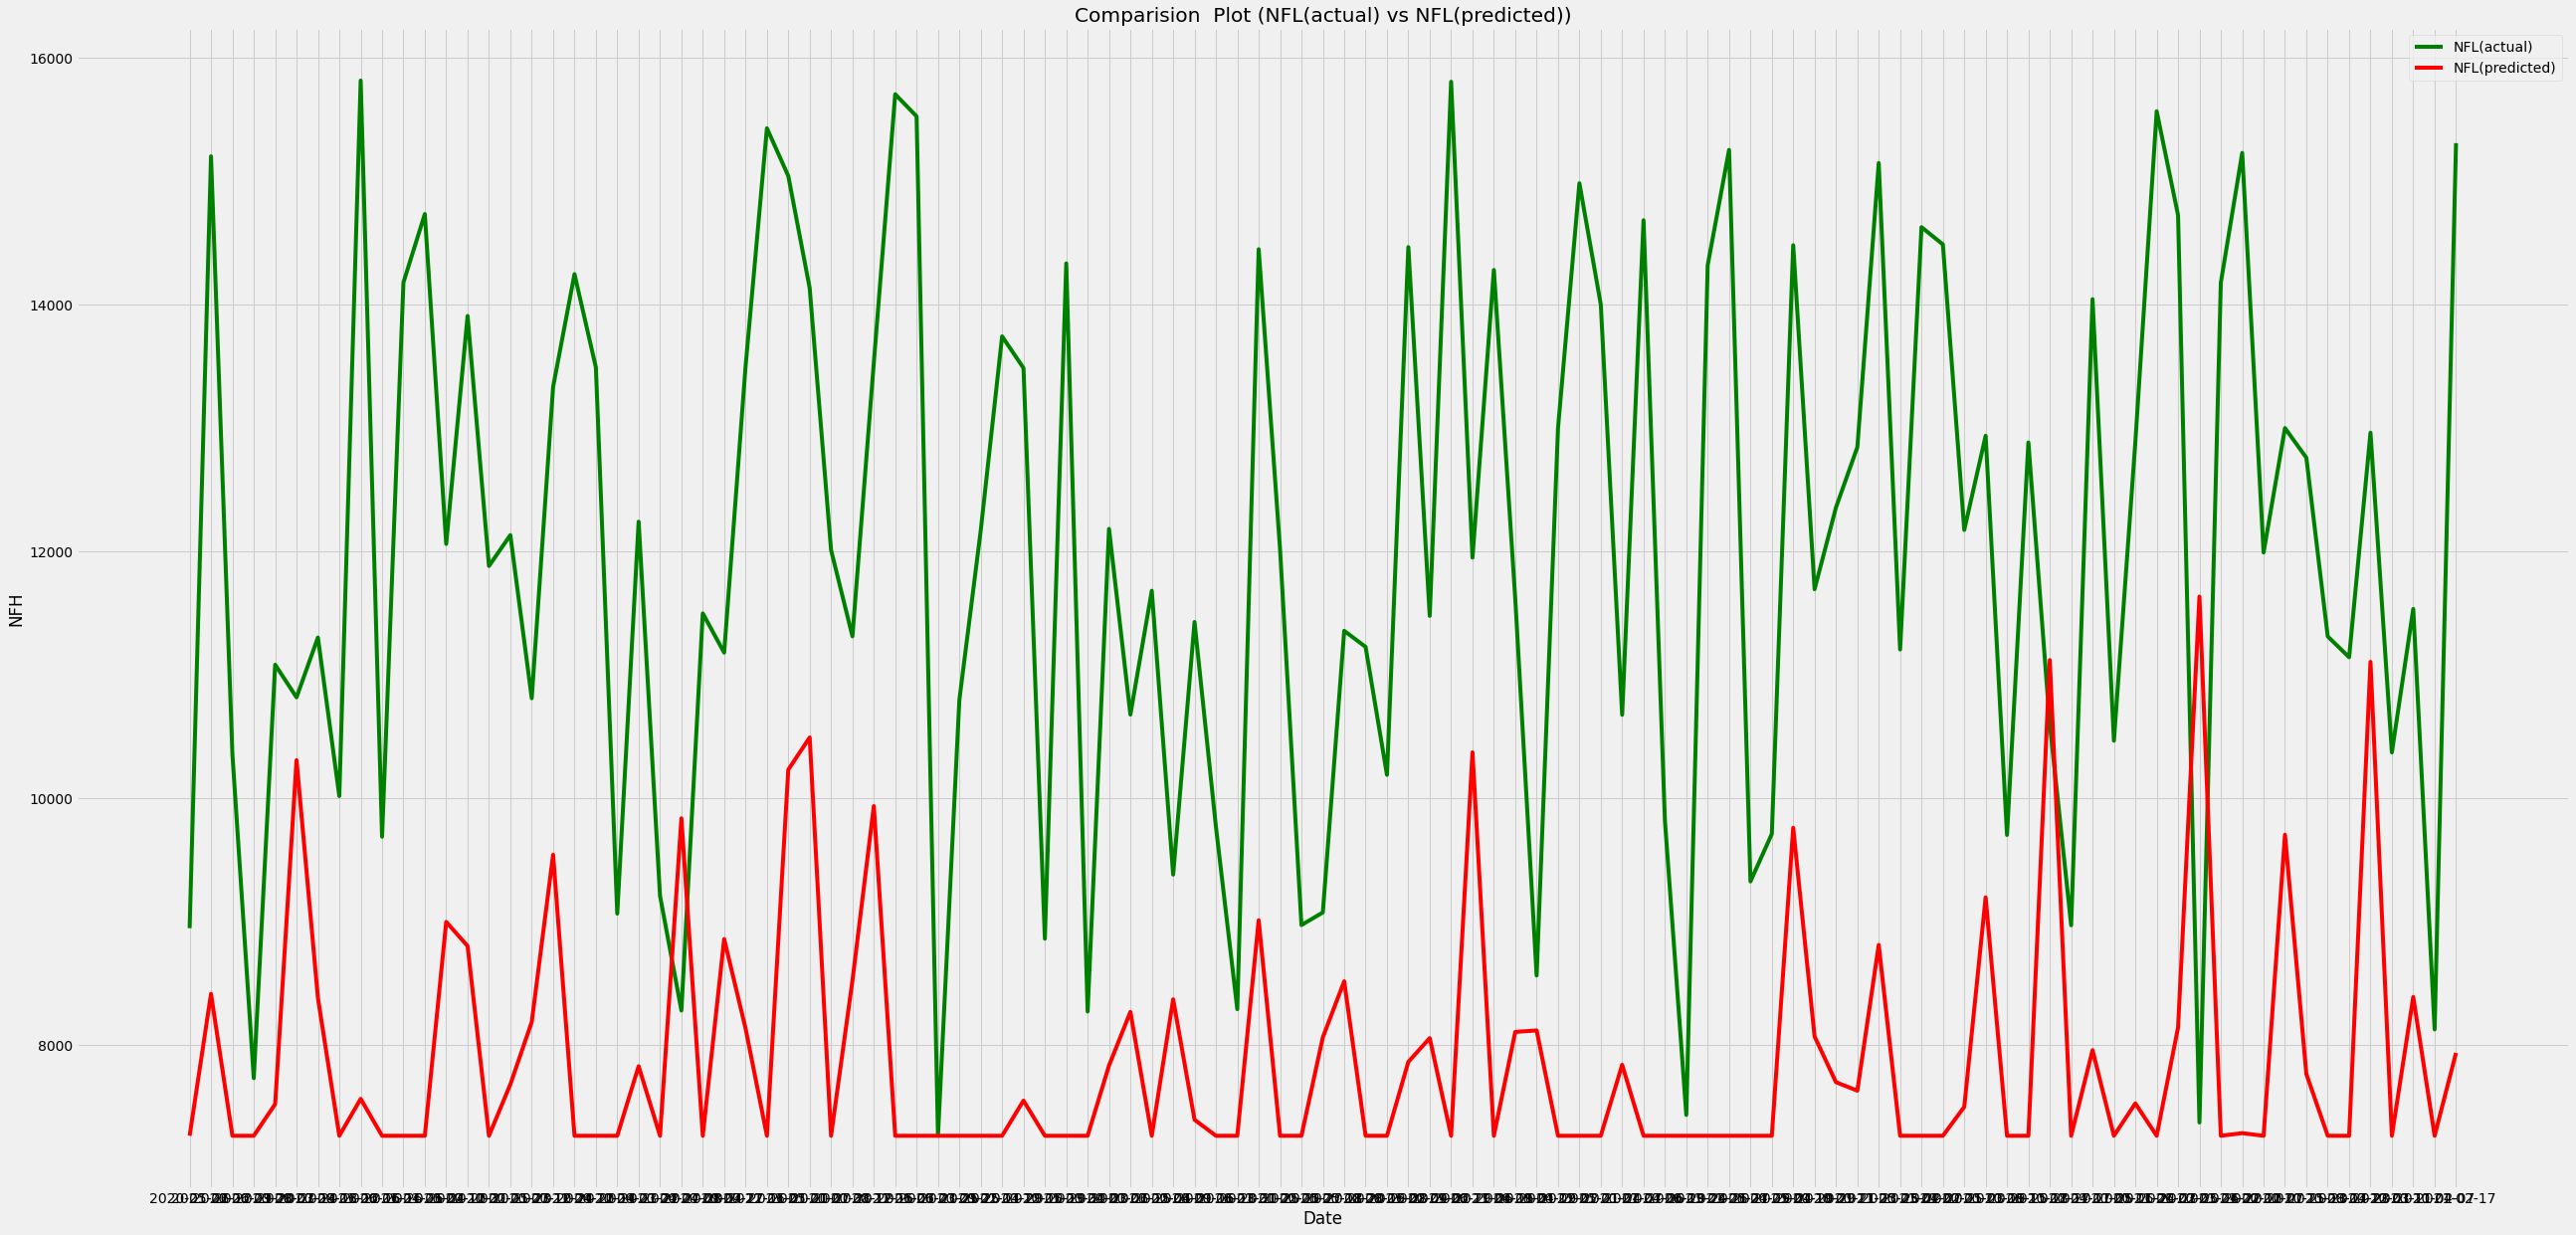

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test1,label='NFL(actual)',color='green')
plt.plot(date,yhat1,label='NFL(predicted)',color='red')
plt.grid(True)
plt.title('Comparision  Plot (NFL(actual) vs NFL(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH')
plt.style.use('fivethirtyeight')
plt.show()
